# Linear Regression

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# 1. Data preprocessing
- I'll use the bike sharing dataset from UCI Machine Learning Repository.
- The dataset contains the hourly count of rental bikes between years 2017 and 2018 in the Capital Bikeshare system with the corresponding weather and seasonal information.
- First I should convert the data to a usable format, like change the holiday and functioning day  and holiday to 0 and 1
- Also I should convert the season and month to one-hot encoding, then I can use the data to train the model.

In [54]:
file_path = './SeoulBikeData.csv'
bike_data = pd.read_csv(file_path)

# Convert 'Date' to datetime and extract year and month as new features
bike_data['Date'] = pd.to_datetime(bike_data['Date'], format='%d/%m/%Y')
bike_data['Year'] = bike_data['Date'].dt.year
bike_data['Month'] = bike_data['Date'].dt.month

# Drop the 'Date' column as we've extracted usable numerical features
bike_data = bike_data.drop(['Date'], axis=1)

# Perform label encoding on 'Seasons', 'Holiday', and 'Functioning Day'
# Here, I used a simple mapping since these are binary or ordinal categories
holiday_mapping = {'No Holiday': 0, 'Holiday': 1}
functioning_day_mapping = {'Yes': 1, 'No': 0}
seasons_mapping = {'Winter': 0, 'Spring': 1, 'Summer': 2, 'Autumn': 3}

bike_data['Holiday'] = bike_data['Holiday'].map(holiday_mapping)
bike_data['Functioning Day'] = bike_data['Functioning Day'].map(functioning_day_mapping)

# Perform one-hot encoding on 'Seasons', 'Month', and 'Year'
bike_data = pd.get_dummies(bike_data, columns=['Seasons', 'Month', 'Year'], drop_first=False)

bool_mapping = {True: 1, False: 0}
bike_data['Seasons_Autumn'] = bike_data['Seasons_Autumn'].map(bool_mapping)
bike_data['Seasons_Spring'] = bike_data['Seasons_Spring'].map(bool_mapping)
bike_data['Seasons_Summer'] = bike_data['Seasons_Summer'].map(bool_mapping)
bike_data['Seasons_Winter'] = bike_data['Seasons_Winter'].map(bool_mapping)
bike_data['Month_1'] = bike_data['Month_1'].map(bool_mapping)
bike_data['Month_2'] = bike_data['Month_2'].map(bool_mapping)
bike_data['Month_3'] = bike_data['Month_3'].map(bool_mapping)
bike_data['Month_4'] = bike_data['Month_4'].map(bool_mapping)
bike_data['Month_5'] = bike_data['Month_5'].map(bool_mapping)
bike_data['Month_6'] = bike_data['Month_6'].map(bool_mapping)
bike_data['Month_7'] = bike_data['Month_7'].map(bool_mapping)
bike_data['Month_8'] = bike_data['Month_8'].map(bool_mapping)
bike_data['Month_9'] = bike_data['Month_9'].map(bool_mapping)
bike_data['Month_10'] = bike_data['Month_10'].map(bool_mapping)
bike_data['Month_11'] = bike_data['Month_11'].map(bool_mapping)
bike_data['Month_12'] = bike_data['Month_12'].map(bool_mapping)
bike_data['Year_2017'] = bike_data['Year_2017'].map(bool_mapping)
bike_data['Year_2018'] = bike_data['Year_2018'].map(bool_mapping)

# 2. Data Scaled
- I need scale the data before training the model. I'll use the min-max scaler to scale the data.

In [55]:
features_to_standardize = ['Hour', 'Temperature(?C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)','Dew point temperature(?C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

# Standardize the features
for feature in features_to_standardize:
    mean = bike_data[feature].mean()
    std = bike_data[feature].std()
    bike_data[feature] = (bike_data[feature] - mean) / std

# 3. Data Visualization
## 3.1 Scatter plot

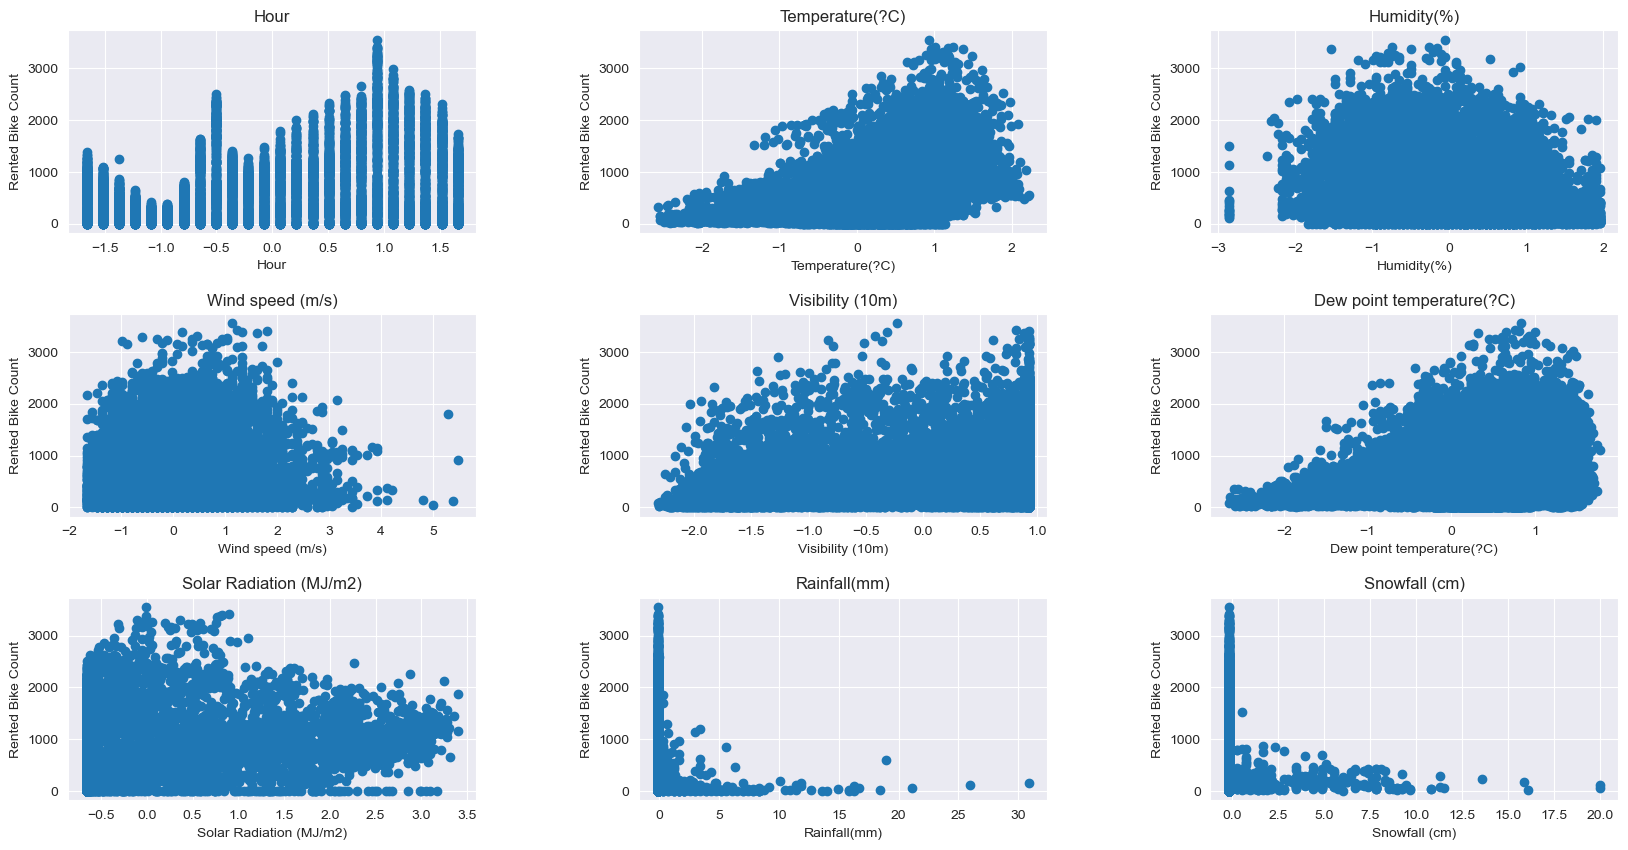

In [56]:
bike_data_labels = ['Hour', 'Temperature(?C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)','Dew point temperature(?C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']

fig, axes = plt.subplots(3, 3, figsize=(20, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i, ax in enumerate(axes.ravel()):
    if i < len(bike_data_labels):
        feature = bike_data_labels[i]
        ax.scatter(bike_data[feature], bike_data['Rented Bike Count'])
        ax.set_title(feature)
        ax.set_xlabel(feature)
        ax.set_ylabel('Rented Bike Count')
    else:
        ax.axis('off')
plt.show()

## 3.2 Correlation
- I'll use the correlation matrix to visualize the correlation between the features and the label.
- The correlation coefficient ranges from -1 to 1.

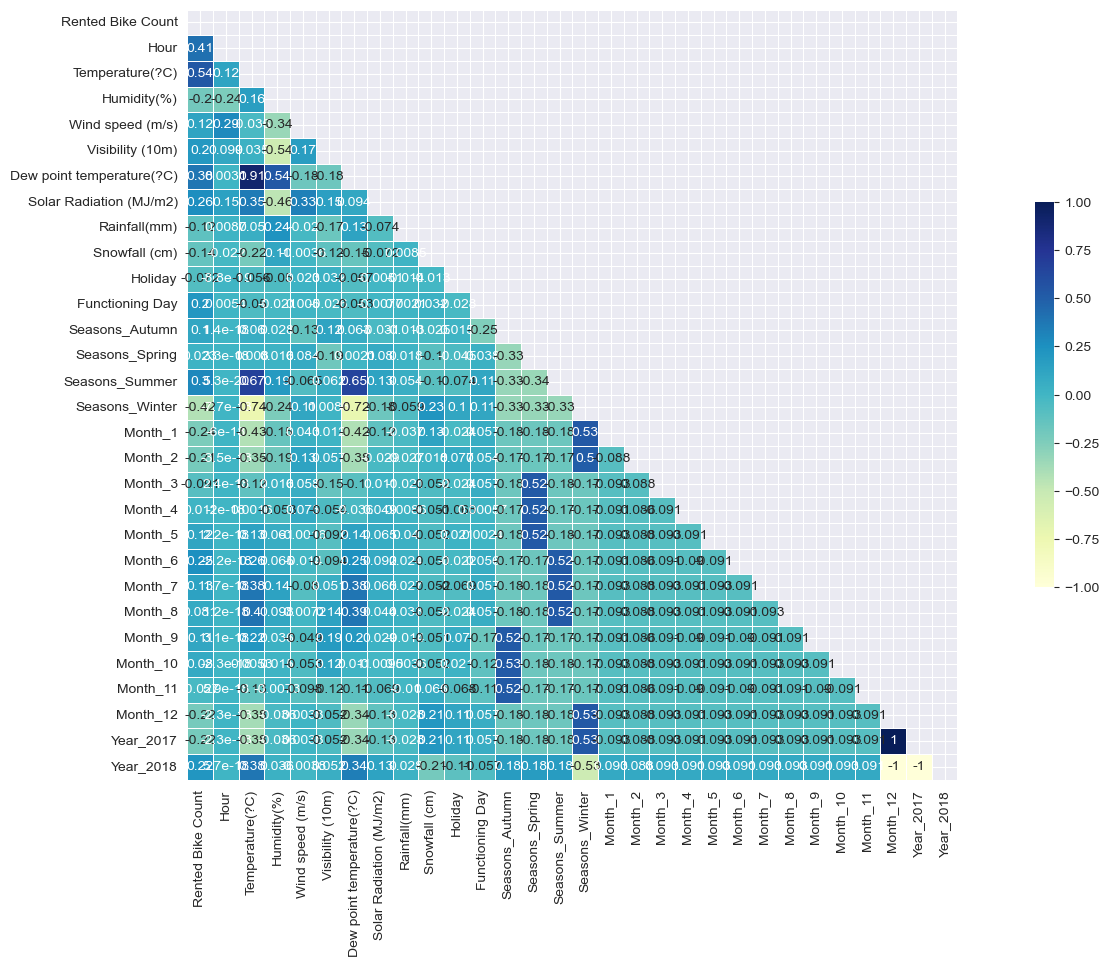

In [57]:
corr = bike_data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(20, 10))
cmap = 'YlGnBu'
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})
plt.show()

## 3.2 Print the correlation coefficient of the features

In [58]:
corr['Rented Bike Count'].sort_values(ascending=False)
print(corr['Rented Bike Count'].sort_values(ascending=False))

Rented Bike Count            1.000000
Temperature(?C)              0.538558
Hour                         0.410257
Dew point temperature(?C)    0.379788
Seasons_Summer               0.296549
Solar Radiation (MJ/m2)      0.261837
Month_6                      0.251051
Year_2018                    0.215162
Functioning Day              0.203943
Visibility (10m)             0.199280
Month_7                      0.133478
Wind speed (m/s)             0.121108
Month_5                      0.116099
Month_9                      0.107167
Seasons_Autumn               0.102753
Month_8                      0.081053
Month_10                     0.080283
Seasons_Spring               0.022888
Month_4                      0.010899
Month_11                    -0.026807
Holiday                     -0.072338
Month_3                     -0.091190
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Month_2                     -0.213923
Month_12    

<Axes: title={'center': 'Correlation with target'}>

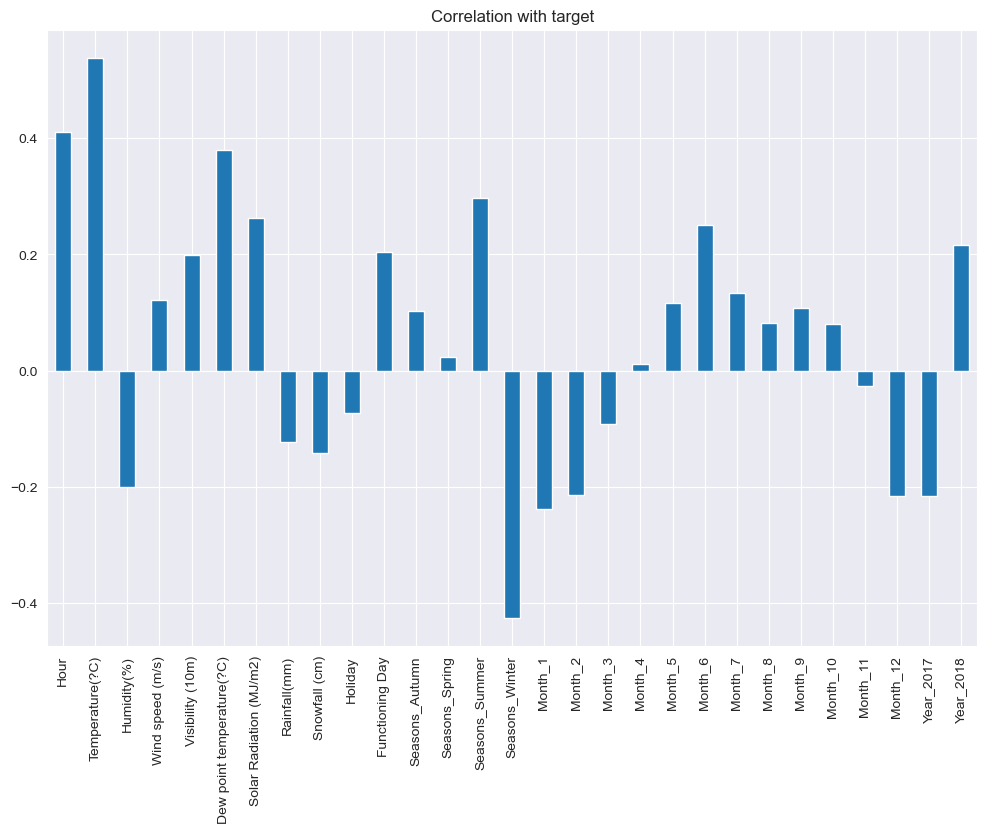

In [59]:
bike_data.drop(['Rented Bike Count'], axis=1).corrwith(bike_data['Rented Bike Count']).plot(kind='bar', grid=True, figsize=(12, 8), title="Correlation with target")

In [60]:
# bike_data.drop(['Wind speed (m/s)', 'Seasons_Summer', 'Holiday','Month_10', 'Month_5'], axis=1)

,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Visibility (10m),Dew point temperature(?C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Functioning Day,...,Month_3,Month_4,Month_6,Month_7,Month_8,Month_9,Month_11,Month_12,Year_2017,Year_2018
0,254,-1.661230,-1.513871,-1.042423,0.925818,-1.659510,-0.655094,-0.131792,-0.171881,1,...,0,0,0,0,0,0,0,1,1,0
1,204,-1.516775,-1.538986,-0.993313,0.925818,-1.659510,-0.655094,-0.131792,-0.171881,1,...,0,0,0,0,0,0,0,1,1,0
2,173,-1.372320,-1.580845,-0.944203,0.925818,-1.667167,-0.655094,-0.131792,-0.171881,1,...,0,0,0,0,0,0,0,1,1,0
3,107,-1.227866,-1.597589,-0.895093,0.925818,-1.659510,-0.655094,-0.131792,-0.171881,1,...,0,0,0,0,0,0,0,1,1,0
4,78,-1.083411,-1.580845,-1.091533,0.925818,-1.736077,-0.655094,-0.131792,-0.171881,1,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,1.083411,-0.726919,-1.189754,0.751562,-1.100567,-0.655094,-0.131792,-0.171881,1,...,0,0,0,0,0,0,1,0,0,1
8756,764,1.227866,-0.793894,-1.042423,0.925818,-1.069940,-0.655094,-0.131792,-0.171881,1,...,0,0,0,0,0,0,1,0,0,1
8757,694,1.372320,-0.860868,-0.944203,0.873213,-1.069940,-0.655094,-0.131792,-0.171881,1,...,0,0,0,0,0,0,1,0,0,1
8758,712,1.516775,-0.902728,-0.845983,0.694024,-1.062283,-0.655094,-0.131792,-0.171881,1,...,0,0,0,0,0,0,1,0,0,1


# 4. Linear Regression
## 4.1 Linear Tools Preparation

In [61]:
def compute_gradients(X, y, predictions):
    """
    Computes the gradients of the cost function with respect to the model parameters.
    :param X: The input features.
    :param y: The actual target values.
    :param predictions: The predicted values from the model.
    :return: The gradients with respect to weights and bias.
    """
    n_samples = len(y)
    dw = np.dot(X.T, (predictions - y)) / n_samples
    db = np.sum(predictions - y) / n_samples
    return dw, db

def compute_cost(predictions, y):
    """
    Computes the cost (mean squared error) between the predictions and the true values.
    :param predictions: The predicted values from the model.
    :param y: The actual target values.
    :return: The computed mean squared error.
    """
    cost = np.mean((predictions - y) ** 2) / 2
    return cost

## 4.2 Linear Regression Class

In [62]:
class LinearRegression:
    """
    Linear Regression class.
    :param learning_rate: The step length that will be taken when following the negative gradient during training.
    :param iterations: The number of iterations to train the model.
    :param w: The weights of the model.
    :param b: The bias of the model.
    :param cost_history: The cost history of the model which will be used to plot the cost over iterations.
    """

    def __init__(self, learning_rate, iterations):
        """
        Initializes the LinearRegression model with specified learning rate and number of iterations.
        :param learning_rate: The learning rate for the model.
        :param iterations: The number of iterations for which the model will be trained.
        """
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.w = None
        self.b = None
        self.cost_history = []

    def initialize_weights(self, n_features):
        """
        Initializes weights and bias to zeros.
        :param n_features: The number of features in the dataset.
        """
        self.w = np.zeros(n_features)
        self.b = 0

    def update_parameters(self, dw, db):
        """
        Updates the model parameters using the computed gradients.
        :param dw: The gradient with respect to weights.
        :param db: The gradient with respect to bias.
        """
        self.w -= self.learning_rate * dw
        self.b -= self.learning_rate * db

    def fit(self, X, y):
        """
        Trains the Linear Regression model using gradient descent.
        :param X: The input features for training.
        :param y: The target values for training.
        """
        n_samples, n_features = X.shape
        self.initialize_weights(n_features)

        for i in range(self.iterations):
            predictions = self.predict(X)

            cost = compute_cost(predictions, y)
            self.cost_history.append(cost)
            if i % 10000 == 0:
                print(f"Cost at iteration {i}: ", cost)

            dw, db = compute_gradients(X, y, predictions)

            self.update_parameters(dw, db)
        
        print({'weights': self.w, 'bias': self.b, 'final cost': cost})

        return self

    def predict(self, X):
        """
        Makes predictions using the linear model.
        :param X: The input features for making predictions.
        :return: The predicted values.
        """
        return np.dot(X, self.w) + self.b

# 5. Train the model
- Now that I have implemented the LinearRegression class, I can train the model.
- I'll use 80% of the data for training and 20% for testing.
- Due the linear regression is regression but my data set is classification, so I need round the predictions to the nearest integer to simulate classification.

## 5.1 Classify the data

In [63]:
# Shuffle the data
bike_data = bike_data.sample(frac=1, random_state=42)

# Split the data
X = bike_data.drop('Rented Bike Count', axis=1).values
y = bike_data['Rented Bike Count'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.2 Train the model

In [64]:
linear_regression_model = LinearRegression(0.001, 50000)
linear_regression_model.fit(X_train, y_train)

predictions = linear_regression_model.predict(X_test)

Cost at iteration 0:  460024.17437214614
Cost at iteration 10000:  94407.88079619672
Cost at iteration 20000:  91145.25675203963
Cost at iteration 30000:  89722.22279828819
Cost at iteration 40000:  88903.07675159175
{'weights': array([ 191.12198254,  235.93075671, -199.51908702,   25.77130926,
         35.2363702 ,  125.36184329,  -75.0035559 ,  -76.3784158 ,
         18.51631069, -119.16158081,  686.97558381,  109.6744953 ,
         31.93847802,    3.02819928, -117.2986745 ,  -51.79484011,
        -85.11860074,  -77.6978659 ,  -16.78891058,  126.42525451,
        302.21832637,  -57.2234247 , -241.96670238,  -28.00814275,
        114.42169474,   23.2609433 ,   19.61476635,   19.61476635,
          7.72773176]), 'bias': 27.342498106987065, 'final cost': 88384.50394545727}


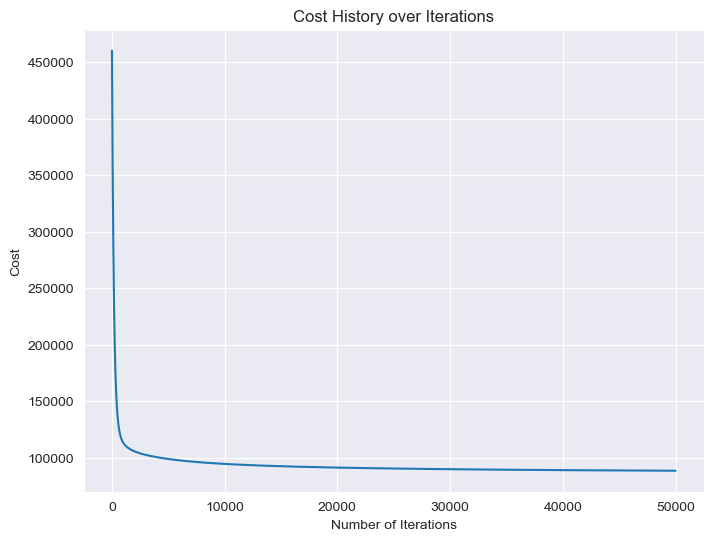

In [65]:
cost_history = linear_regression_model.cost_history
plt.figure(figsize=(8, 6))
plt.plot(cost_history)
plt.title('Cost History over Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.show()

# 6. Evaluate the model
## 6.1 Calculate the mse of the model
MSE (Mean Squared Error) is calculated as follows:
$$
\[ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 \]
$$
Where:

- $\( n \)$ is the number of samples.
- $\( y_i \)$ is the actual value.
- $\( \hat{y}_i \)$ is the predicted value.
- $\( (y_i - \hat{y}_i)^2 \)$ is the square of the difference between the actual and predicted values.


In [66]:
def mse(y_true, y_pred):
    """
    The mse function is used to compute the mse of the model.
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :return: the mse of the model
    """
    return np.sum((y_true - y_pred) ** 2) / len(y_true)

print(f"MSE: {mse(y_test, predictions):.2f}")

MSE: 157399.09


## 6.2 Calculate the rmse of the model
RMSE (Root Mean Squared Error) is calculated as follows:
$$
\[ \text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2} \]
$$
Where:

- $\( n \)$ is the number of samples.
- $\( y_i \)$ is the actual value.
- $\( \hat{y}_i \)$ is the predicted value.
- $\( (y_i - \hat{y}_i)^2 \)$ is the square of the difference between the actual and predicted values.

In [67]:
def rmse(y_true, y_pred):
    """
    The rmse function is used to compute the rmse of the model.
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :return: the rmse of the model
    """
    return np.sqrt(np.sum((y_true - y_pred) ** 2) / len(y_true))

print(f"RMSE: {rmse(y_test, predictions):.2f}")

RMSE: 396.74


## 6.3 Calculate the r2 score of the model

R2 score (coefficient of determination) is calculated as follows:
$$
\[ \text{R2} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2} \]
$$
Where:

- $\( n \)$ is the number of samples.
- $\( y_i \)$ is the actual value.
- $\( \hat{y}_i \)$ is the predicted value.
- $\( \bar{y} \)$ is the mean of the actual values.

In [68]:
def r2_score(y_true, y_pred):
    """
    The r2_score function is used to compute the r2 score of the model.
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :return: the r2 score of the model
    """
    mean = np.mean(y_true)
    ss_tot = np.sum((y_true - mean) ** 2)
    ss_res = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_res / ss_tot)
    return r2

print(f"R2 Score: {r2_score(y_test, predictions):.2f}")

R2 Score: 0.60


## 6.4 Calculate the mae of the model
MAE (Mean Absolute Error) is calculated as follows:
$$
\[ \text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i| \]
$$
Where:

- $\( n \)$ is the number of samples.
- $\( y_i \)$ is the actual value.
- $\( \hat{y}_i \)$ is the predicted value.

In [69]:
def mae(y_true, y_pred):
    """
    The mae function is used to compute the mae of the model.
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :return: the mae of the model
    """
    return np.sum(np.abs(y_true - y_pred)) / len(y_true)

print(f"MAE: {mae(y_test, predictions):.2f}")

MAE: 297.61


## 6.5 Modify different iteration times

In [70]:
linear_regression_model1 = LinearRegression(0.001, 500)
linear_regression_model1.fit(X_train, y_train)
predictions1 = linear_regression_model1.predict(X_test)

linear_regression_model2 = LinearRegression(0.001, 1500)
linear_regression_model2.fit(X_train, y_train)
predictions2 = linear_regression_model2.predict(X_test)

linear_regression_model3 = LinearRegression(0.001, 5000)
linear_regression_model3.fit(X_train, y_train)
predictions3 = linear_regression_model3.predict(X_test)

Cost at iteration 0:  460024.17437214614
{'weights': array([ 94.59026291, 105.14562349, -47.02338505,  21.51054884,
        40.95273015,  71.23345383,  41.36651523, -31.33063779,
       -19.62556321,   4.97801085, 180.35627222,  55.68248618,
        45.32975803,  67.69906041,   6.70742209,   0.44902515,
        -0.22763932,   8.35193784,  14.2933487 ,  22.68447149,
        32.1642946 ,  20.58306676,  14.95169904,  20.39310188,
        20.91491606,  14.37446824,   6.48603627,   6.48603627,
       168.93269044]), 'bias': 175.41872671061915, 'final cost': 136342.1562247395}
Cost at iteration 0:  460024.17437214614
{'weights': array([169.48719067, 158.66028162, -89.41674209,  20.45936244,
        57.27417686, 100.95006689,  28.8043185 , -61.35472519,
        -9.88468816,   1.16655551, 237.93297183,  81.69288206,
        56.3983488 ,  83.65904991,  -7.48451364,  -9.05634968,
       -13.13909237,   3.10123916,  16.80529841,  36.49181123,
        59.38835194,  21.41601453,   2.85468345,  25.7

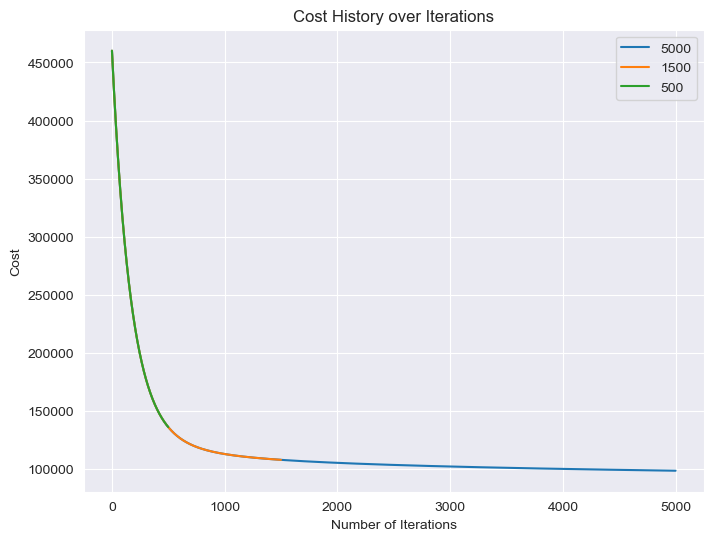

In [71]:
cost_history1 = linear_regression_model1.cost_history
cost_history2 = linear_regression_model2.cost_history
cost_history3 = linear_regression_model3.cost_history
plt.figure(figsize=(8, 6))
plt.plot(cost_history3, label='5000')
plt.plot(cost_history2, label='1500')
plt.plot(cost_history1, label='500')
plt.title('Cost History over Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

## 6.6 Modify different learning rate

In [72]:
linear_regression_model4 = LinearRegression(0.0001, 30000)
linear_regression_model4.fit(X_train, y_train)
predictions4 = linear_regression_model4.predict(X_test)

linear_regression_model5 = LinearRegression(0.001, 30000)
linear_regression_model5.fit(X_train, y_train)
predictions5 = linear_regression_model5.predict(X_test)

linear_regression_model6 = LinearRegression(0.01, 30000)
linear_regression_model6.fit(X_train, y_train)
predictions6 = linear_regression_model6.predict(X_test)

linear_regression_model7 = LinearRegression(0.1, 30000)
linear_regression_model7.fit(X_train, y_train)
predictions7 = linear_regression_model7.predict(X_test)

Cost at iteration 0:  460024.17437214614
Cost at iteration 10000:  113128.56072549883
Cost at iteration 20000:  105531.36116702667
{'weights': array([ 199.19454674,  180.54217067, -121.71309046,   12.63672547,
         51.7298151 ,  107.64763625,   -3.70927322,  -76.14140163,
          4.6514992 ,   -6.85050315,  263.33161592,   96.18129189,
         59.37991106,   79.75088128,  -25.37085342,  -21.22055853,
        -29.57680754,   -6.32656701,   15.9996142 ,   49.70686387,
         89.3988618 ,   13.78737029,  -23.43535081,   23.68340379,
         45.6159753 ,   26.8819128 ,   25.42651265,   25.42651265,
        184.51471816]), 'bias': 209.9412308161489, 'final cost': 102385.03040910914}
Cost at iteration 0:  460024.17437214614
Cost at iteration 10000:  94407.88079619672
Cost at iteration 20000:  91145.25675203963
{'weights': array([ 192.28351462,  230.06871487, -200.22043891,   24.28358374,
         31.52731152,  119.62843424,  -73.66457522,  -76.49164437,
         18.71543265,  -97.4

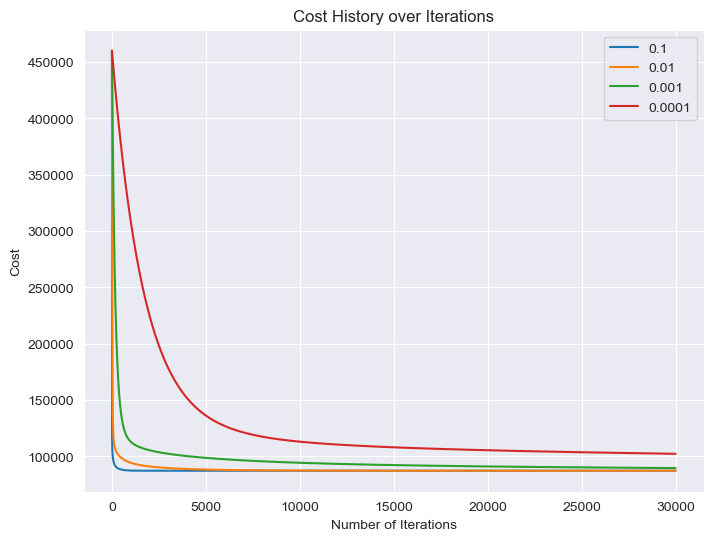

In [73]:
cost_history4 = linear_regression_model4.cost_history
cost_history5 = linear_regression_model5.cost_history
cost_history6 = linear_regression_model6.cost_history
cost_history7 = linear_regression_model7.cost_history
plt.figure(figsize=(8, 6))
plt.plot(cost_history7, label='0.1')
plt.plot(cost_history6, label='0.01')
plt.plot(cost_history5, label='0.001')
plt.plot(cost_history4, label='0.0001')
plt.title('Cost History over Iterations')
plt.xlabel('Number of Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

<a id="logistic regression"></a>
# logistic regression

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# 1. Input and process data
## 1.1. Load data

In [60]:
column_names = [
    "erythema", "scaling", "definite borders", "itching", "koebner phenomenon",
    "polygonal papules", "follicular papules", "oral mucosal involvement", "knee and elbow involvement",
    "scalp involvement", "family history", "melanin incontinence", "eosinophils in the infiltrate",
    "PNL infiltrate", "fibrosis of the papillary dermis", "exocytosis", "acanthosis",
    "hyperkeratosis", "parakeratosis", "clubbing of the rete ridges", "elongation of the rete ridges",
    "thinning of the suprapapillary epidermis", "spongiform pustule", "munro microabcess",
    "focal hypergranulosis", "disappearance of the granular layer", "vacuolisation and damage of basal layer",
    "spongiosis", "saw-tooth appearance of retes", "follicular horn plug", "perifollicular parakeratosis",
    "inflammatory monoluclear inflitrate", "band-like infiltrate", "Age", "class"
]

dermatology_data = pd.read_csv('dermatology/dermatology.data', header=None, names=column_names)

## 1.2. Preprocess data
- I will replace the missing values with the median value of the column.
- Also I found that the colum "perifollicular parakeratosis" has only one value, so I will drop it.
- Due to the logistic regression, I will delete class 6,5,4,2

In [61]:
dermatology_data.replace("?", pd.NA, inplace=True)
dermatology_data['Age'] = pd.to_numeric(dermatology_data['Age'], errors='coerce')

# Fill the missing values in 'Age' with the median age
age_median = dermatology_data['Age'].median()
dermatology_data['Age'].fillna(age_median, inplace=True)

# delete class 6,5,4,2
dermatology_data = dermatology_data[dermatology_data['class'] != 6]
dermatology_data = dermatology_data[dermatology_data['class'] != 5]
dermatology_data = dermatology_data[dermatology_data['class'] != 4]
dermatology_data = dermatology_data[dermatology_data['class'] != 2]

dermatology_data.drop('perifollicular parakeratosis', axis=1, inplace=True)

dermatology_data.replace(3, 0, inplace=True)

## 1.3. Visualization of data

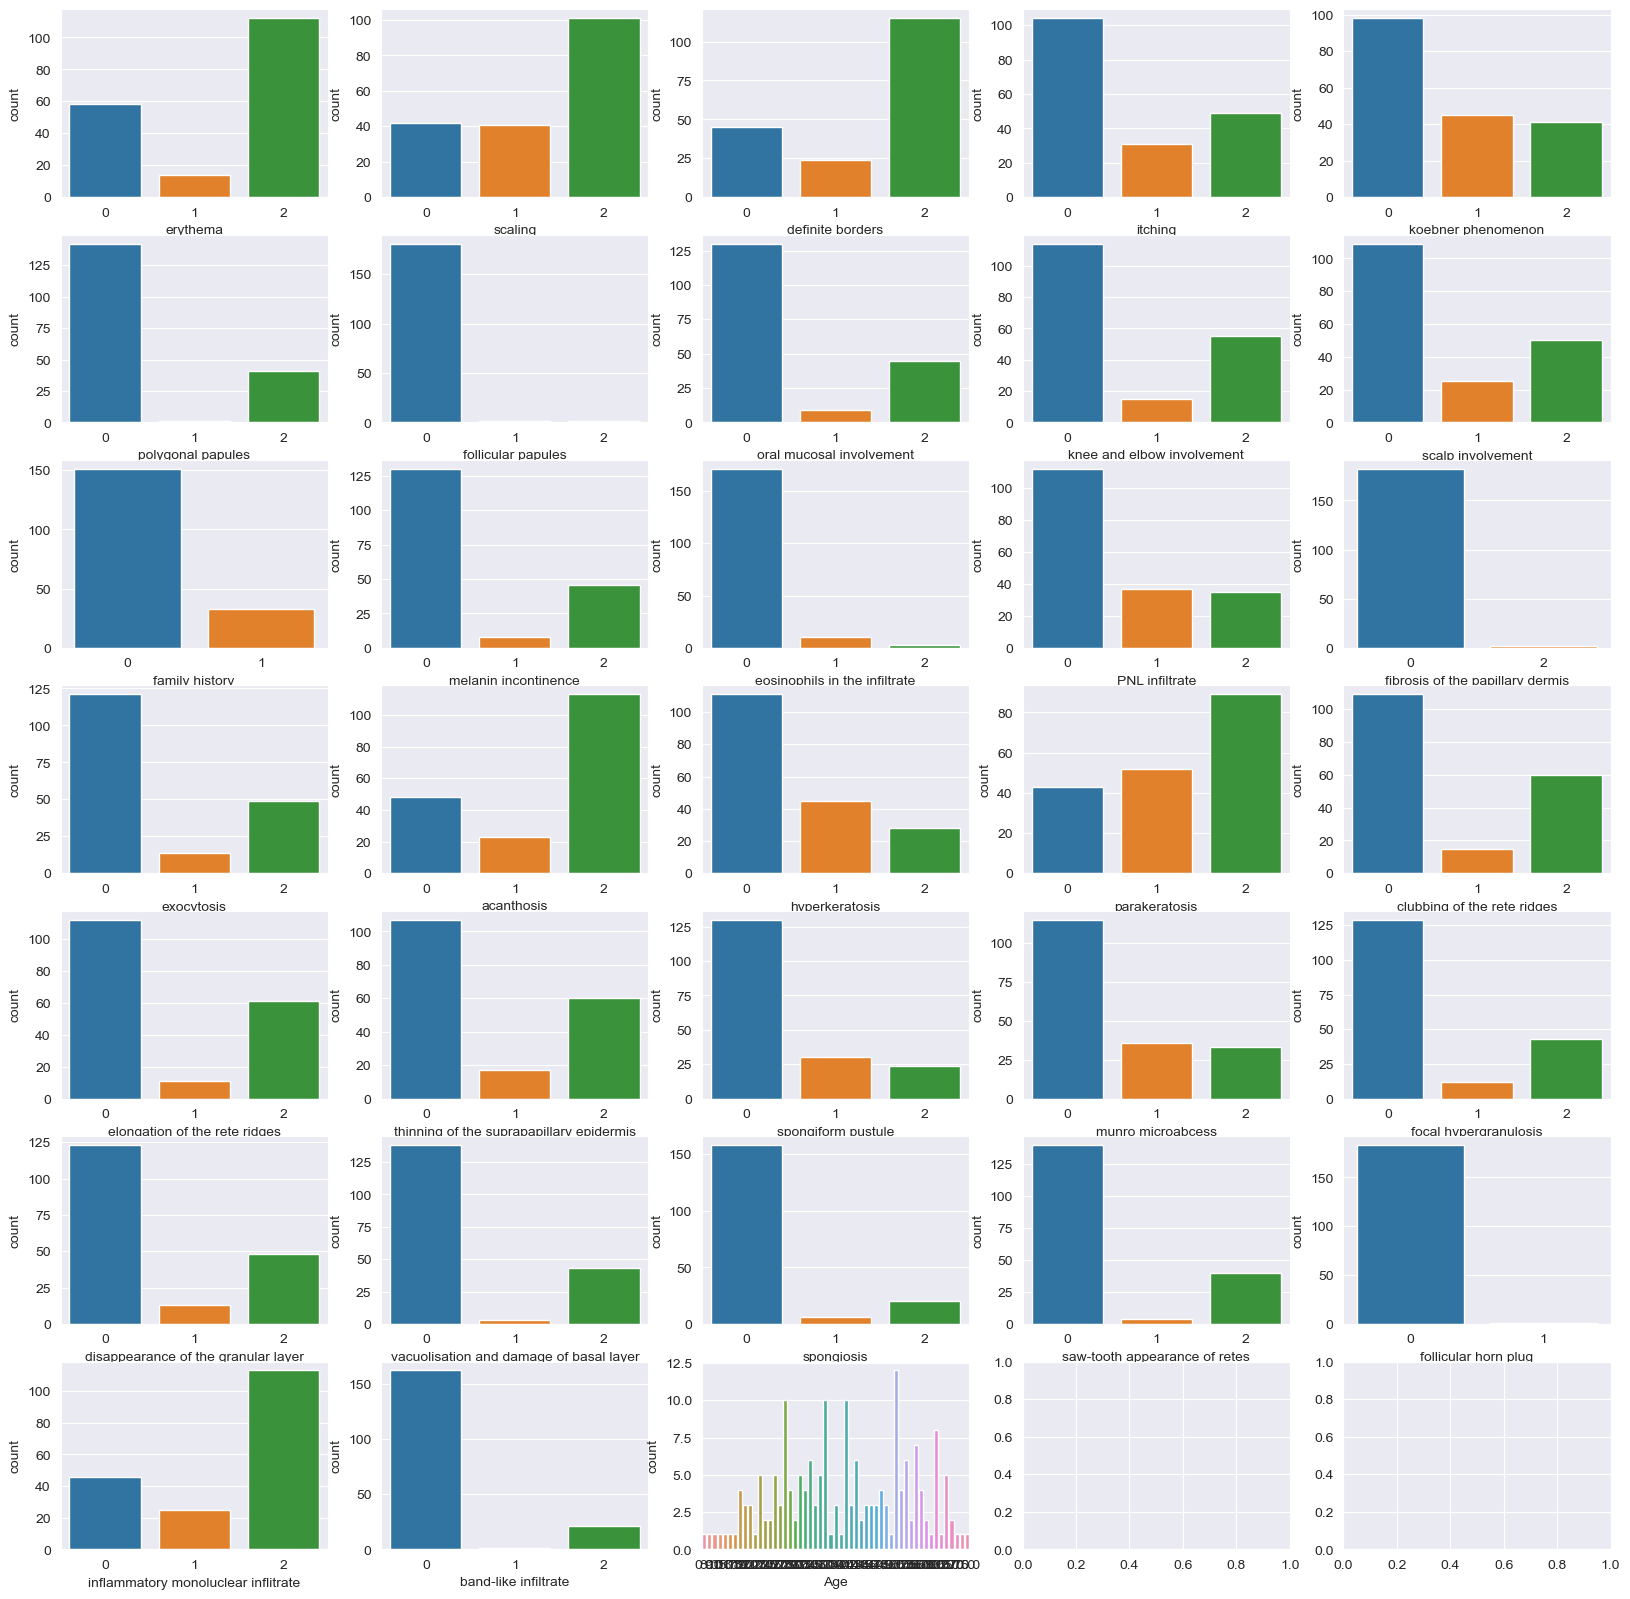

In [62]:
fig, ax = plt.subplots(7, 5, figsize=(20, 20))
for i, column in enumerate(dermatology_data.columns[:-1]):
    sns.countplot(x=column, data=dermatology_data, ax=ax[i//5][i%5])
plt.show()

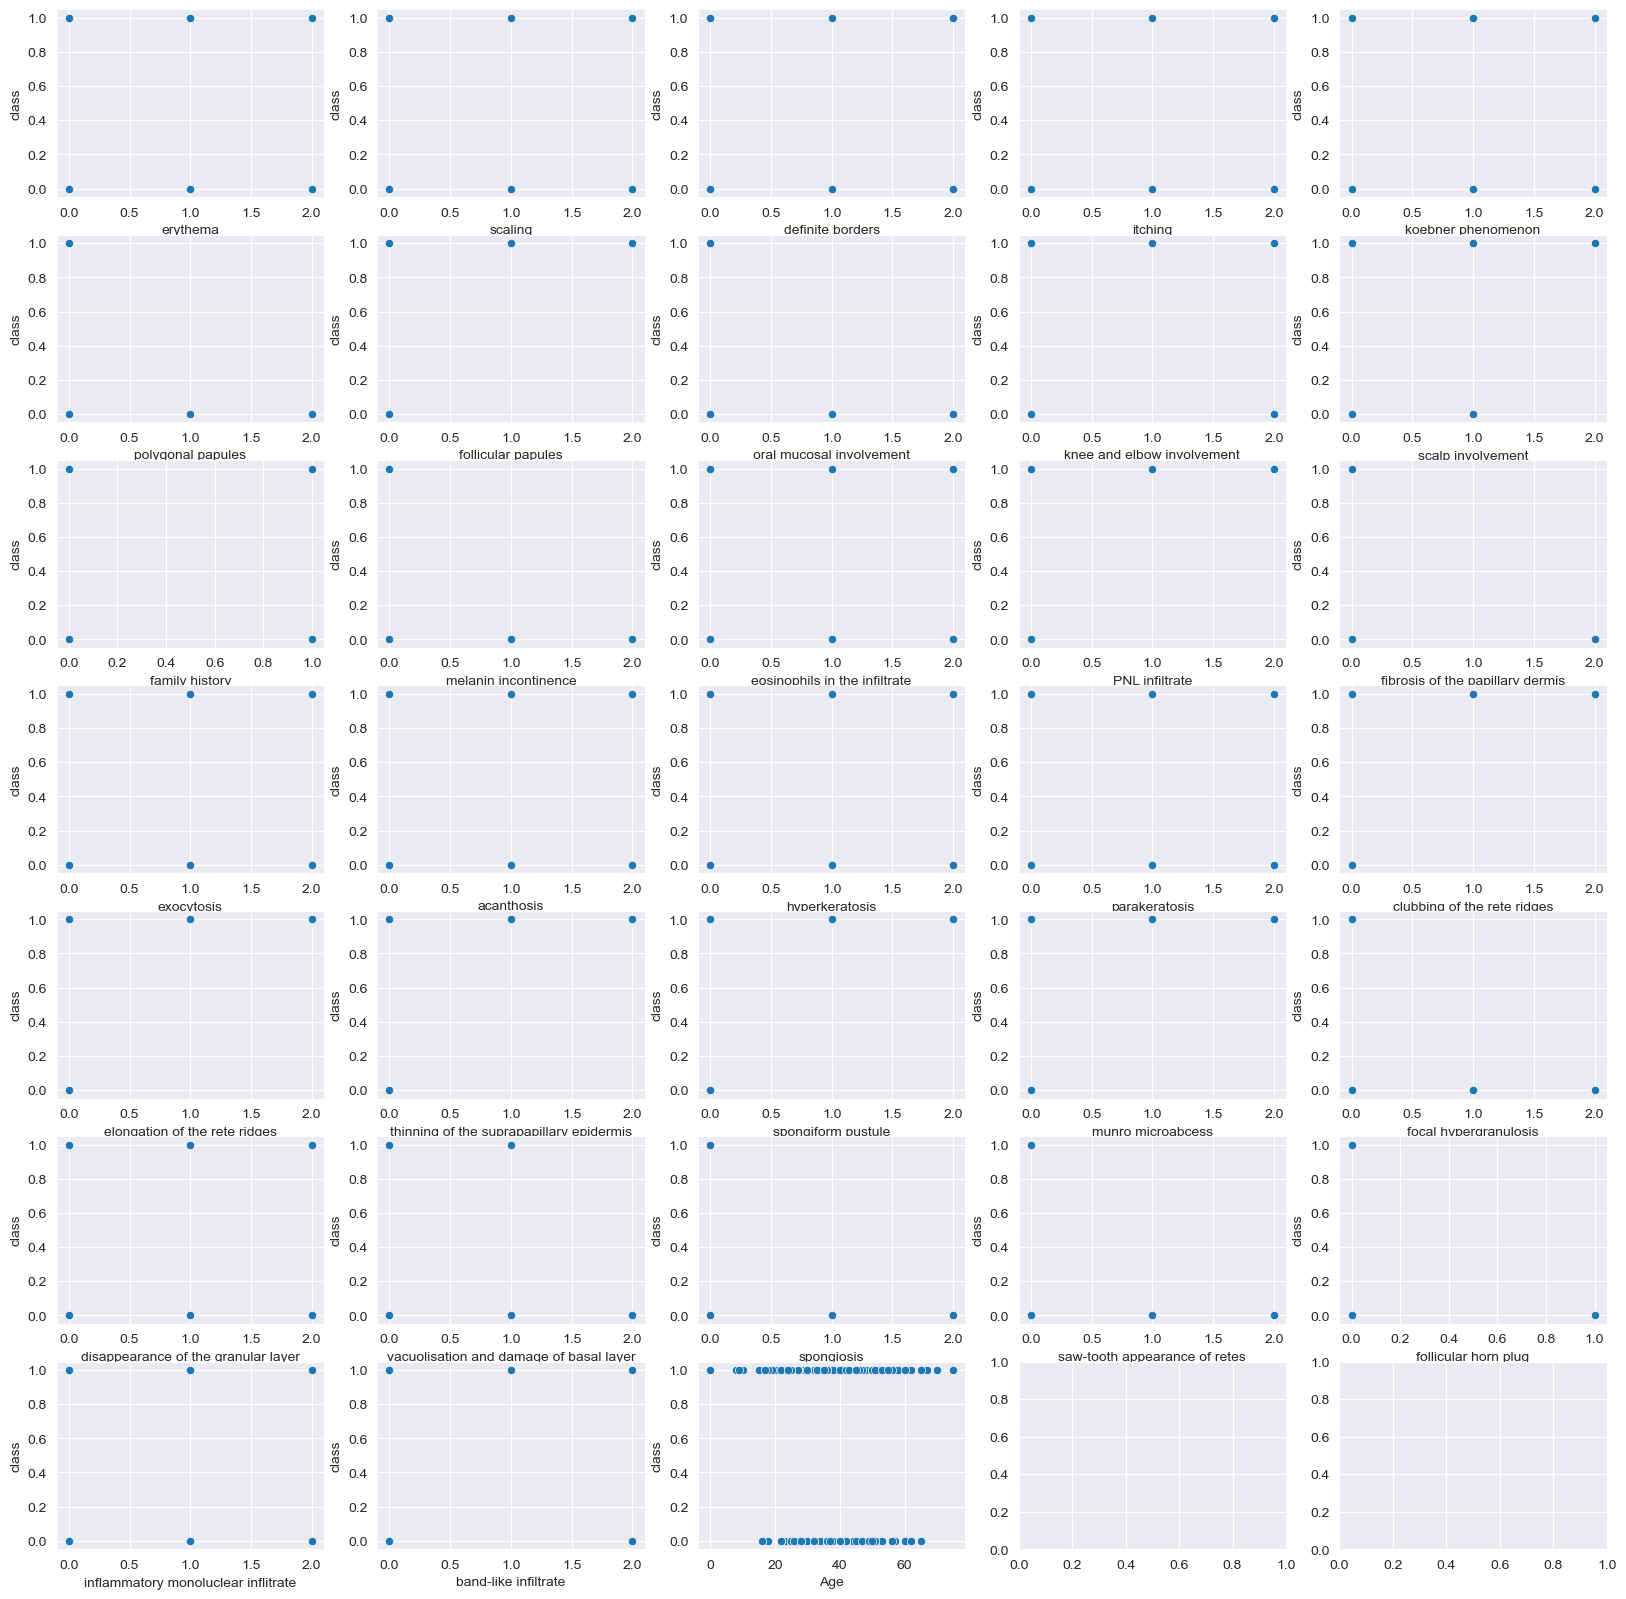

In [63]:
fig, ax = plt.subplots(7, 5, figsize=(20, 20))
for i, column in enumerate(dermatology_data.columns[:-1]):
    sns.scatterplot(x=column, y='class', data=dermatology_data, ax=ax[i//5][i%5])
plt.show()

## 1.4. Scale data
- I will scale the data using the min-max scaler.

In [64]:
dermatology_data_scaled = dermatology_data.copy()
for column in dermatology_data.columns[:-1]:
    col_min = dermatology_data[column].min()
    col_max = dermatology_data[column].max()
    dermatology_data_scaled[column] = (dermatology_data[column] - col_min) / (col_max - col_min)

# 1.5. Split data
- I will split the data into training and testing sets.

In [65]:
X = dermatology_data_scaled.drop('class', axis=1).values
y = dermatology_data_scaled['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Logistic Regression
## 2.1 Tools preparation
- I will define the sigmoid function.

In [66]:
def sigmoid(z):
    """
    To compute the sigmoid function for the input x
    :param z: the input data
    :return: the sigmoid function for the input x
    """
    return 1 / (1 + np.exp(-z))

## 2.2. Model preparation

In [67]:
class LogisticRegressionModel:
    """
    Logistic Regression Model
    :param learning_rate: the learning rate
    :param num_iterations: the number of iterations
    :param w: the weights
    :param b: the bias
    :param cost_history: the cost history will be used to plot the cost history
    """
    def __init__(self, learning_rate, num_iterations):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.w = None
        self.b = None
        self.cost_history = []

    def compute_cost(self, X, y):
        """
        To compute the cost function
        :param X: the input data
        :param y: the labels
        :return: the cost of the model
        """
        m = len(y)
        h = sigmoid(np.dot(X, self.w) + self.b)
        epsilon = 1e-5
        cost = (-1/m) * np.sum(y * np.log(h + epsilon) + (1 - y) * np.log(1 - h + epsilon))
        return cost

    def compute_gradient(self, X, y):
        """
        To compute the gradient of the cost function
        :param X: the input data
        :param y: the labels
        :return: the gradient of the cost function
        """
        m = len(y)
        h = sigmoid(np.dot(X, self.w) + self.b)
        gradient_w = np.dot(X.T, (h - y)) / m
        gradient_b = np.sum(h - y) / m
        return gradient_w, gradient_b

    def fit(self, X, y):
        """
        To train the model, this function will update the weights and the bias and save the cost history.
        :param X: the input data
        :param y: the labels
        """
        self.w = np.zeros(X.shape[1])
        self.b = 0
        for i in range(self.num_iterations):
            gradient_w, gradient_b = self.compute_gradient(X, y)
            self.w -= self.learning_rate * gradient_w
            self.b -= self.learning_rate * gradient_b
            cost = self.compute_cost(X, y)
            self.cost_history.append(cost)
        
        print(f"Final cost: {self.cost_history[-1]}")

    def predict_prob(self, X):
        """
        To predict the probability of the input data
        :param X: the input data
        :return: the probability of the input data
        """
        return sigmoid(np.dot(X, self.w) + self.b)

    def predict(self, X):
        """
        due to the logistic regression, I will predict the labels using the probability, so I use this function to convert the probability to the labels - 0 or 1.
        :param X: the input data
        :return: the labels of the input data which are 0 or 1
        """
        return [1 if x >= 0.5 else 0 for x in self.predict_prob(X)]

    def get_cost_history(self):
        """
        To get the cost history
        :return: the cost history
        """
        return self.cost_history


# 3. Train the model
- I will train the model using the training set.

In [68]:
model = LogisticRegressionModel(learning_rate=0.01, num_iterations=10000)

# Train the model
model.fit(X_train, y_train)

predictions_test = model.predict(X_test)

Final cost: 0.021058013118538086


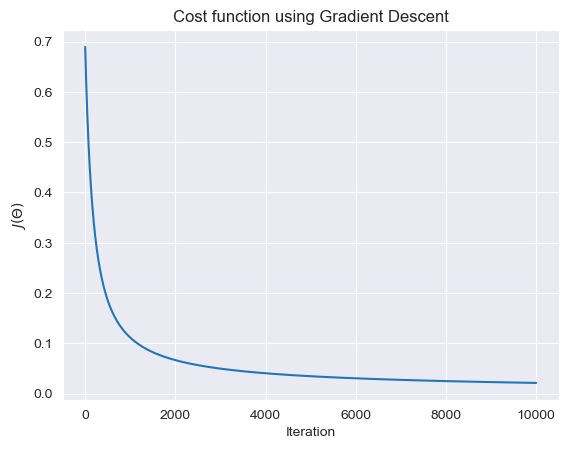

In [69]:
# Plot the cost history 
plt.plot(model.get_cost_history())
plt.xlabel('Iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent')
plt.show()

# 4. Evaluate the model
## 4.1. Accuracy
I will calculate the accuracy of the model.
Accuracy is calculated as follows:
$$\( \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} \times 100 \) $$
Where:
- $\( \text{Number of correct predictions} \)$ is the number of correct predictions.
- $\( \text{Total number of predictions} \)$ is the number of all predictions.
- $\( \text{Accuracy} \)$ is the accuracy of the model.
- I will use the function below to calculate the accuracy of the model.

In [70]:
def accuracy(y_true, y_pred):
    """
    To calculate the accuracy of the model
    :param y_true: the true labels
    :param y_pred: the predicted labels
    """
    correct = 0
    for i in range(len(y_true)):  
        if y_true[i] == y_pred[i]: 
            correct += 1 
            
    result = correct / len(y_true) * 100
    print(f"Accuracy: {result:.2f}%")

accuracy(y_test, predictions_test)

Accuracy: 97.30%


## 4.2. Visualization of  Confusion matrix

Recall: 1.00
Precision: 0.96
F1 score: 0.98


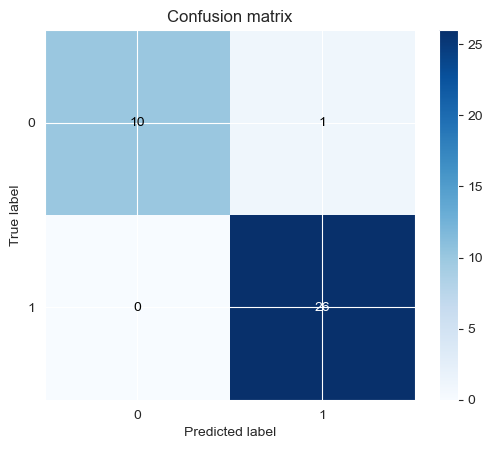

In [71]:
def confusion_matrix(y_true, y_pred):
    """
    To calculate the confusion matrix
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :return: the confusion matrix
    """
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            true_positive += 1
        elif y_true[i] == 0 and y_pred[i] == 0:
            true_negative += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            false_positive += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            false_negative += 1
            
    recall = true_positive / (true_positive + false_negative)
    precision = true_positive / (true_positive + false_positive)
    f1_score = 2 * precision * recall / (precision + recall)
    print(f"Recall: {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 score: {f1_score:.2f}")
    return true_positive, true_negative, false_positive, false_negative

def plot_confusion_matrix(y_true, y_pred):
    """
    To plot the confusion matrix
    :param y_true: the true labels
    :param y_pred: the predicted labels
    """
    tp, tn, fp, fn = confusion_matrix(y_true, y_pred)
    cm = np.array([[tn, fp], [fn, tp]])
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['0', '1'])
    plt.yticks(tick_marks, ['0', '1'])
    
    for i in range(2):
        for j in range(2):
            plt.text(j, i, cm[i, j], ha="center", va="center", color="white" if cm[i, j] > cm.max() / 2. else "black")

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()
    
plot_confusion_matrix(y_test, predictions_test)

## 4.3. Modify different iteration times

In [72]:
model1 = LogisticRegressionModel(learning_rate=0.01, num_iterations=500)
model1.fit(X_train, y_train)
predictions_test1 = model1.predict(X_test)
accuracy(y_test, predictions_test1)

model2 = LogisticRegressionModel(learning_rate=0.01, num_iterations=1000)
model2.fit(X_train, y_train)
predictions_test2 = model2.predict(X_test)
accuracy(y_test, predictions_test2)

model3 = LogisticRegressionModel(learning_rate=0.01, num_iterations=3000)
model3.fit(X_train, y_train)
predictions_test3 = model3.predict(X_test)
accuracy(y_test, predictions_test3)

model4 = LogisticRegressionModel(learning_rate=0.01, num_iterations=10000)
model4.fit(X_train, y_train)
predictions_test4 = model4.predict(X_test)
accuracy(y_test, predictions_test4)

Final cost: 0.1854038816138338
Accuracy: 97.30%
Final cost: 0.11125259730852262
Accuracy: 97.30%
Final cost: 0.04945826095644937
Accuracy: 97.30%
Final cost: 0.021058013118538086
Accuracy: 97.30%


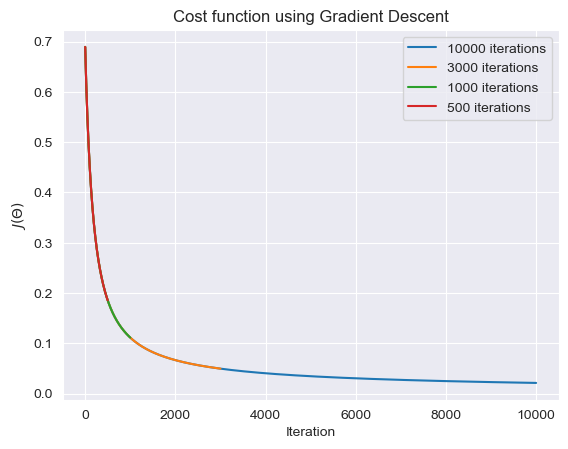

In [73]:
cost_history1 = model1.get_cost_history()
cost_history2 = model2.get_cost_history()
cost_history3 = model3.get_cost_history()
cost_history4 = model4.get_cost_history()

plt.plot(cost_history4, label='10000 iterations')
plt.plot(cost_history3, label='3000 iterations')
plt.plot(cost_history2, label='1000 iterations')
plt.plot(cost_history1, label='500 iterations')

plt.xlabel('Iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent')
plt.legend()
plt.show()

## 4.4. Modify different learning rate

In [74]:
model1 = LogisticRegressionModel(learning_rate=0.001, num_iterations=10000)
model1.fit(X_train, y_train)
predictions_test1 = model1.predict(X_test)
accuracy(y_test, predictions_test1)

model2 = LogisticRegressionModel(learning_rate=0.01, num_iterations=10000)
model2.fit(X_train, y_train)
predictions_test2 = model2.predict(X_test)
accuracy(y_test, predictions_test2)

model3 = LogisticRegressionModel(learning_rate=0.1, num_iterations=10000)
model3.fit(X_train, y_train)
predictions_test3 = model3.predict(X_test)
accuracy(y_test, predictions_test3)

model4 = LogisticRegressionModel(learning_rate=1, num_iterations=10000)
model4.fit(X_train, y_train)
predictions_test4 = model4.predict(X_test)
accuracy(y_test, predictions_test4)

Final cost: 0.11132026838080475
Accuracy: 97.30%
Final cost: 0.021058013118538086
Accuracy: 97.30%
Final cost: 0.003380021982972968
Accuracy: 97.30%
Final cost: 0.000386806304982997
Accuracy: 97.30%


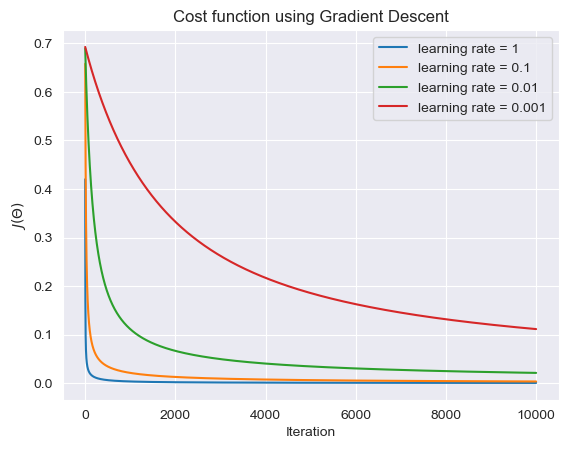

In [75]:
cost_history1 = model1.get_cost_history()
cost_history2 = model2.get_cost_history()
cost_history3 = model3.get_cost_history()
cost_history4 = model4.get_cost_history()

plt.plot(cost_history4, label='learning rate = 1')
plt.plot(cost_history3, label='learning rate = 0.1')
plt.plot(cost_history2, label='learning rate = 0.01')
plt.plot(cost_history1, label='learning rate = 0.001')

plt.xlabel('Iteration')
plt.ylabel('$J(\Theta)$')
plt.title('Cost function using Gradient Descent')
plt.legend()
plt.show()

## 4.5. Results visualization

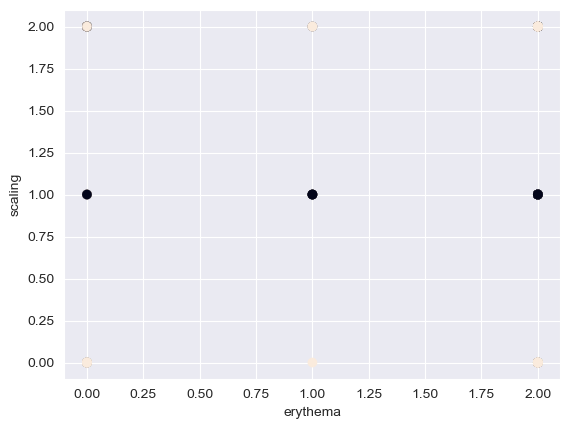

In [76]:
# Plot the erythema and scaling
plt.scatter(dermatology_data['erythema'], dermatology_data['scaling'], c=dermatology_data['class'])
plt.xlabel('erythema')
plt.ylabel('scaling')

plt.show()

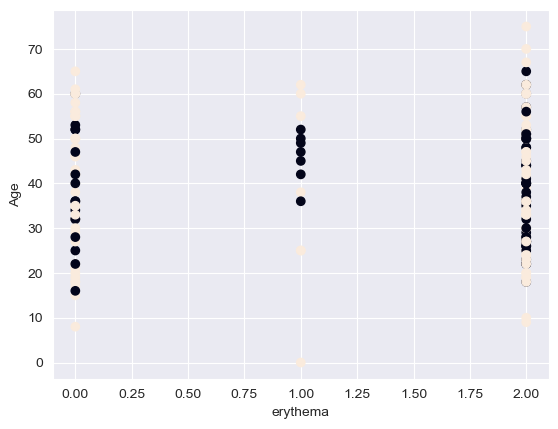

In [77]:
# Plot the koebner phenomenon and scaling
plt.scatter(dermatology_data['erythema'], dermatology_data['Age'], c=dermatology_data['class'])
plt.xlabel('erythema')
plt.ylabel('Age')

plt.show()

# ANN
# 1. Import Libraries

In [180]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load Data

In [181]:
column_names = ["erythema", "scaling", "definite borders", "itching", "koebner phenomenon",
    "polygonal papules", "follicular papules", "oral mucosal involvement", "knee and elbow involvement",
    "scalp involvement", "family history", "melanin incontinence", "eosinophils in the infiltrate",
    "PNL infiltrate", "fibrosis of the papillary dermis", "exocytosis", "acanthosis",
    "hyperkeratosis", "parakeratosis", "clubbing of the rete ridges", "elongation of the rete ridges",
    "thinning of the suprapapillary epidermis", "spongiform pustule", "munro microabcess",
    "focal hypergranulosis", "disappearance of the granular layer", "vacuolisation and damage of basal layer",
    "spongiosis", "saw-tooth appearance of retes", "follicular horn plug", "perifollicular parakeratosis",
    "inflammatory monoluclear inflitrate", "band-like infiltrate", "Age", "class"
]

dermatology_data = pd.read_csv('dermatology/dermatology.data', header=None, names=column_names)

# 3. Data Preprocessing
## 3.1 Data replace and fill missing values
- Replace the missing values with NaN
- Convert the 'Age' column to numeric
- Fill the missing values in 'Age' with the median age
- Drop the 'perifollicular parakeratosis' column(because all values are 0)

In [182]:
# Replacing the missing values with NaN
dermatology_data.replace("?", pd.NA, inplace=True)
dermatology_data['Age'] = pd.to_numeric(dermatology_data['Age'], errors='coerce')

# Filling the missing values in 'Age' with the median age
age_median = dermatology_data['Age'].median()
dermatology_data['Age'].fillna(age_median, inplace=True)

# Dropping the 'perifollicular parakeratosis' column
dermatology_data.drop('perifollicular parakeratosis', axis=1, inplace=True)

## 3.2 Data visualization

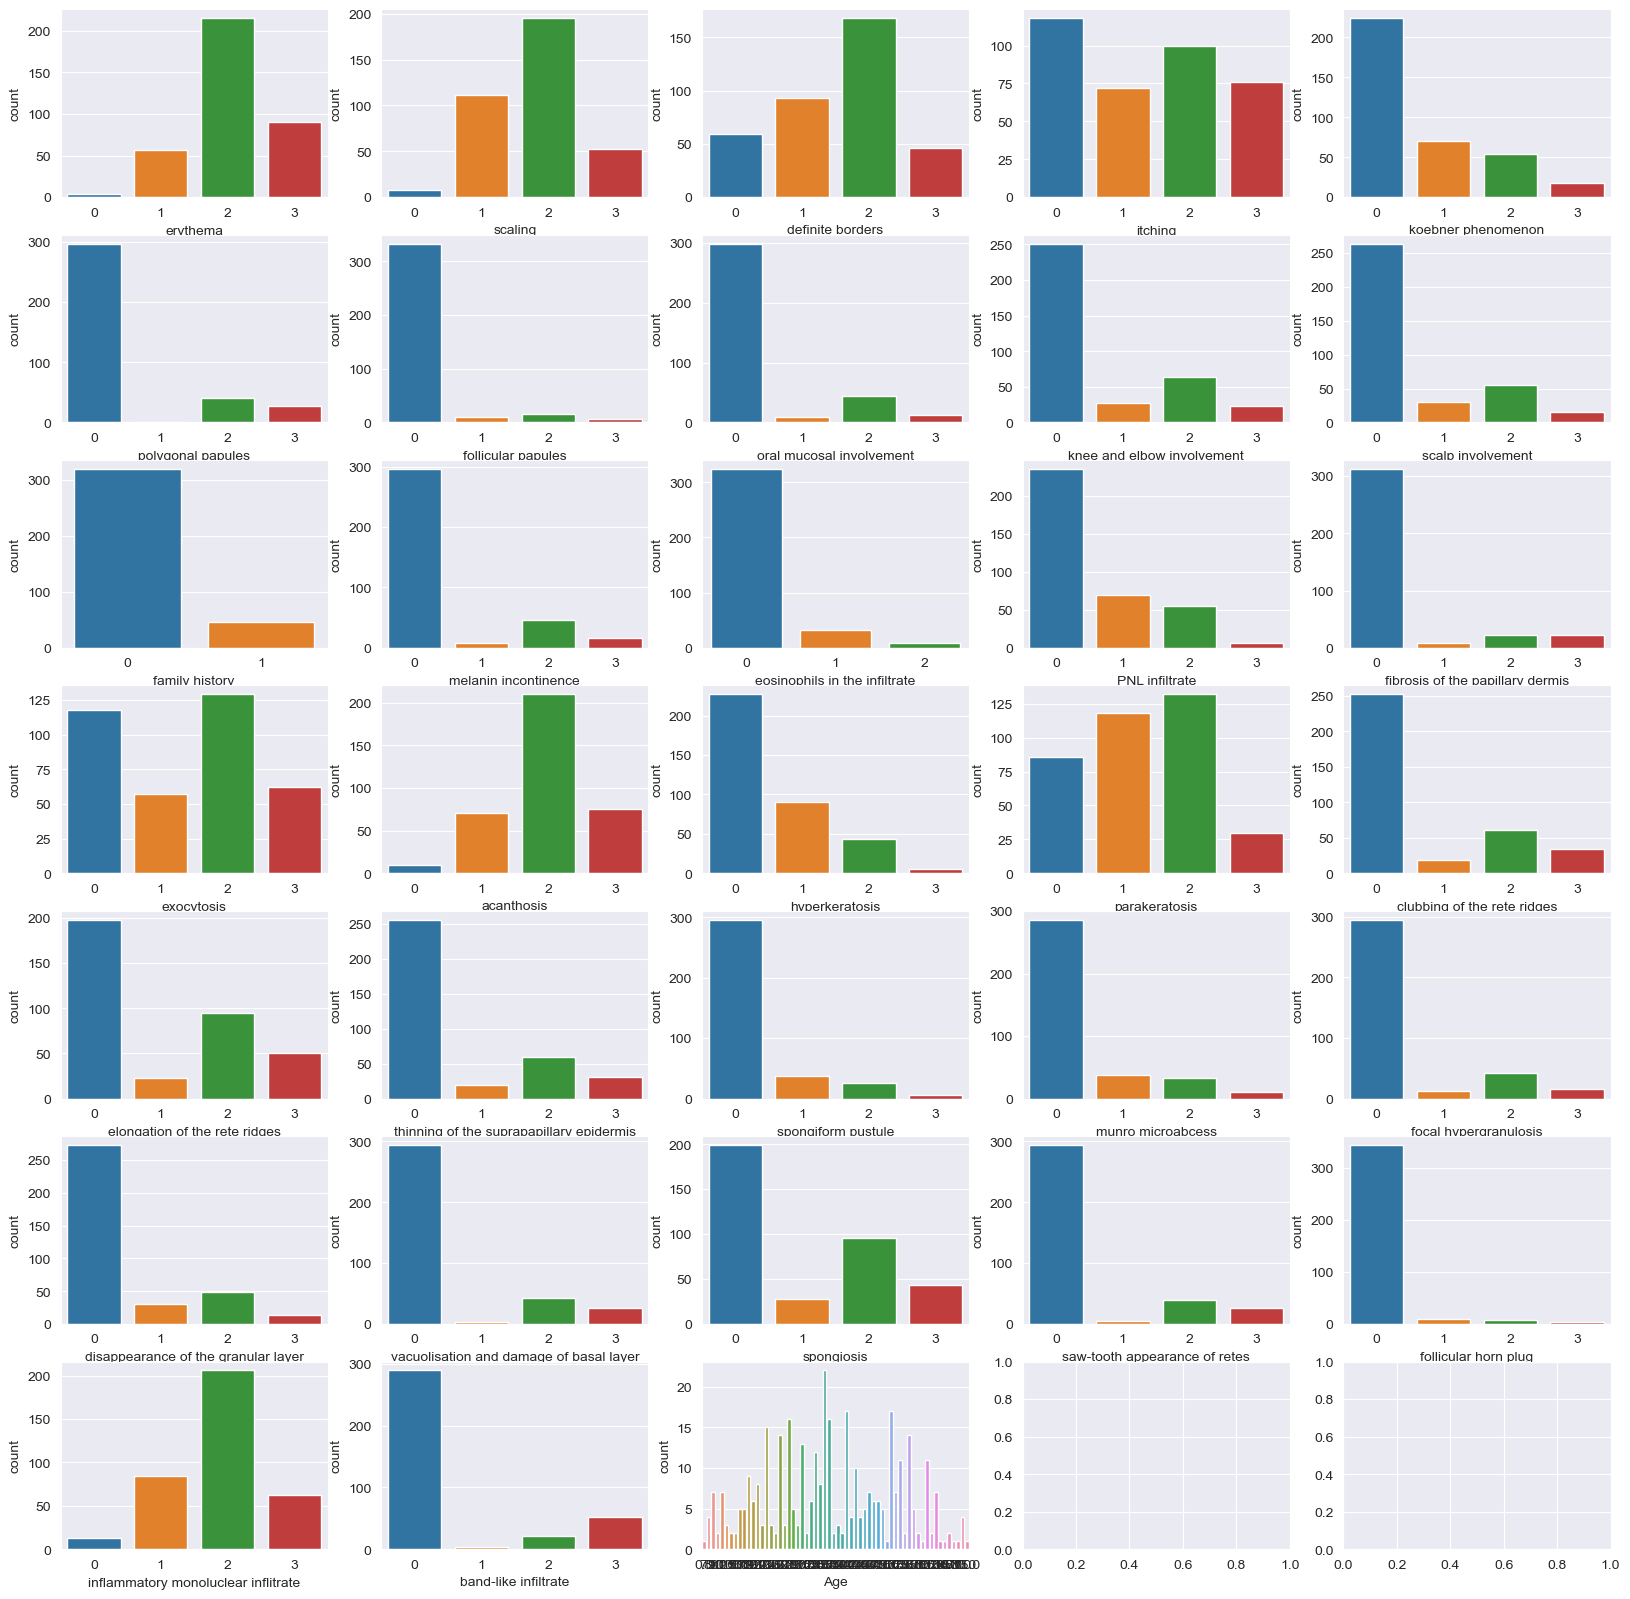

In [183]:
fig, ax = plt.subplots(7, 5, figsize=(20, 20))
for i, column in enumerate(dermatology_data.columns[:-1]):
    sns.countplot(x=column, data=dermatology_data, ax=ax[i//5][i%5])
plt.show()

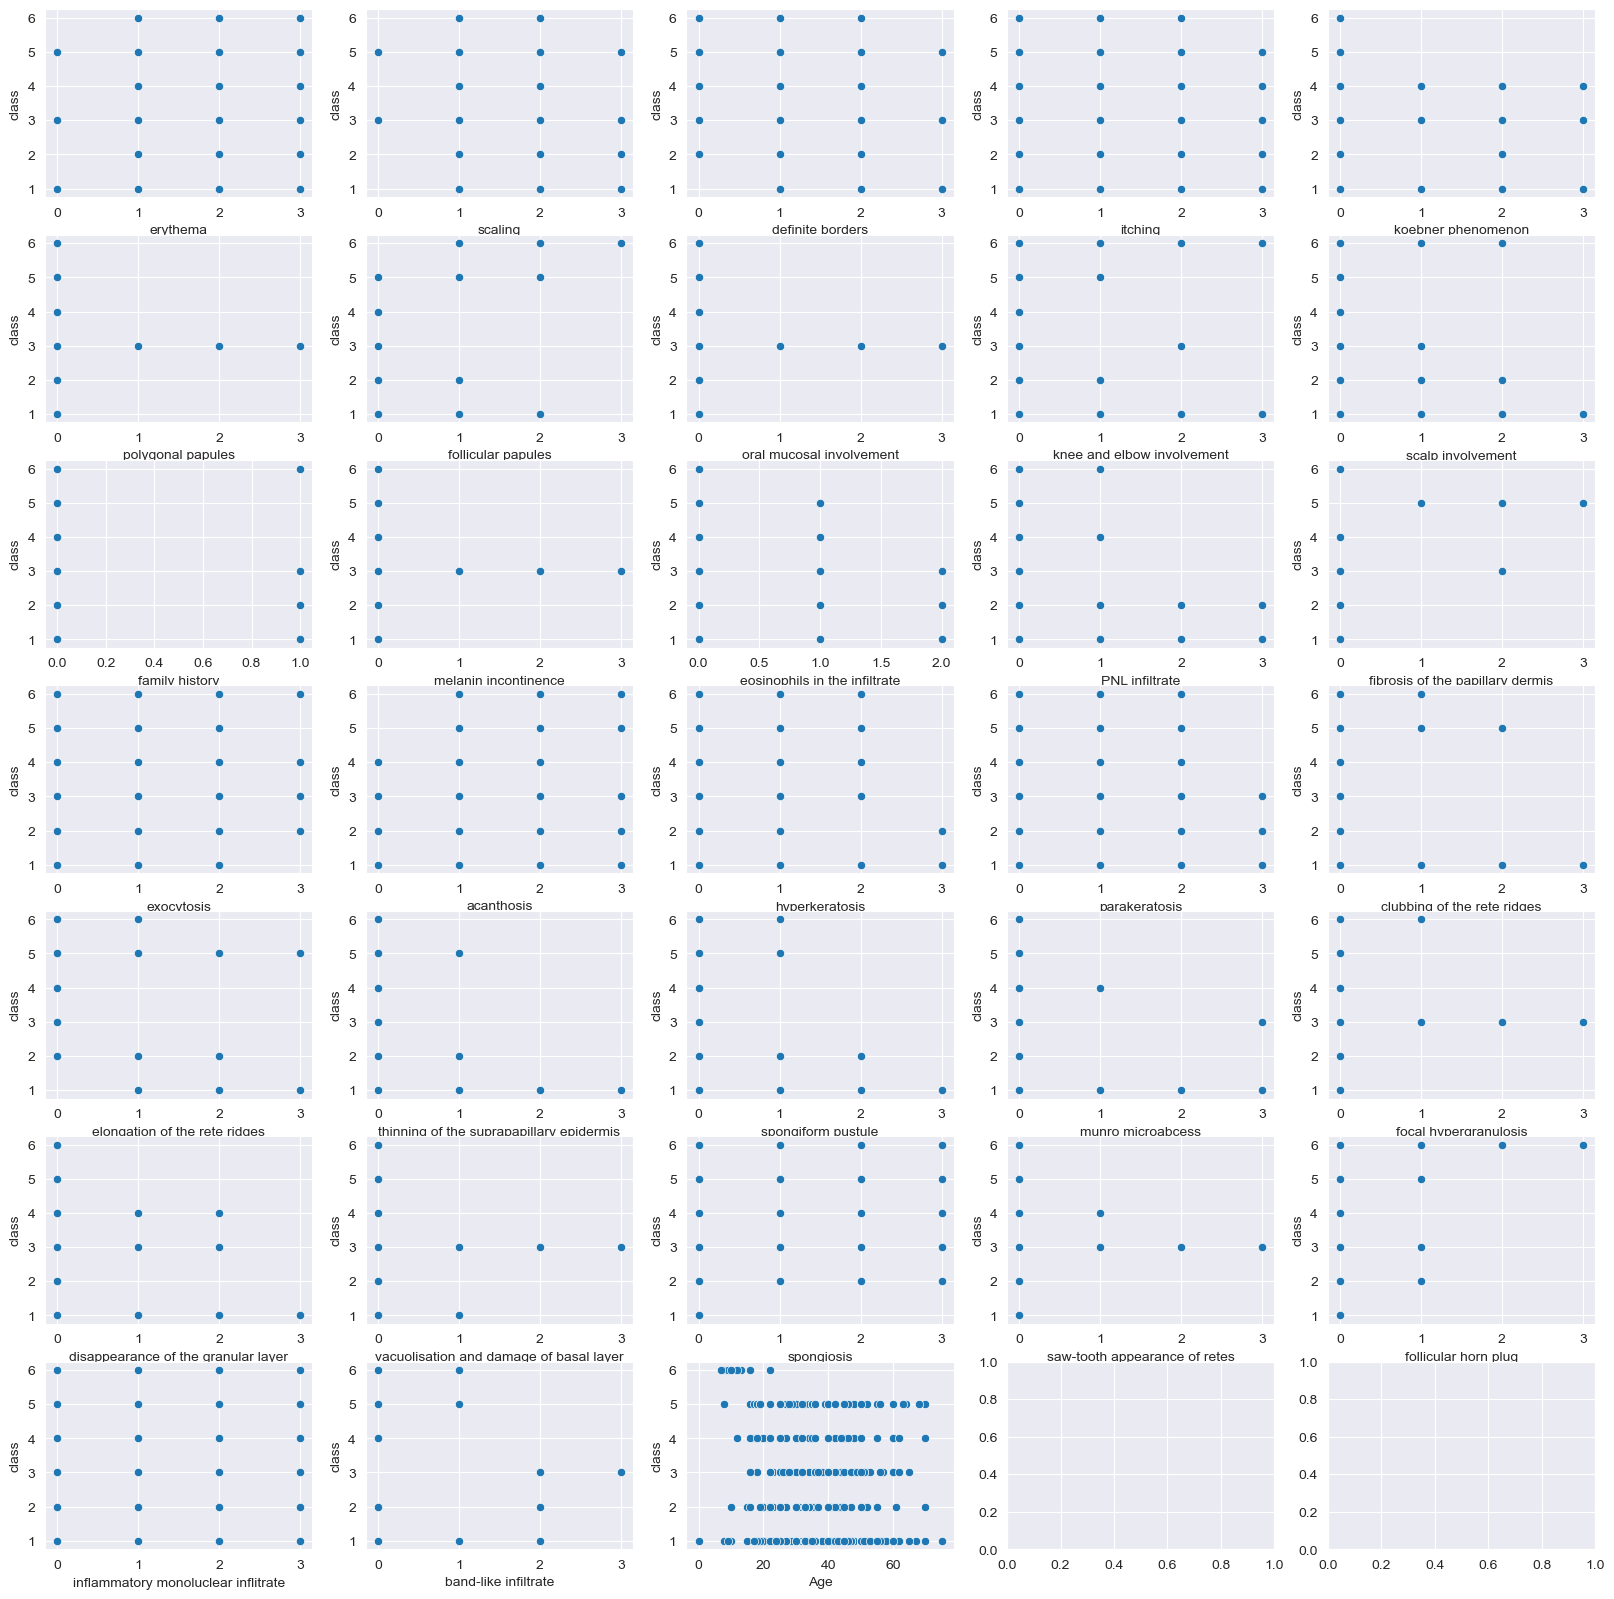

In [184]:
# plot the relationship between 'Age' and 'class'
fig, ax = plt.subplots(7, 5, figsize=(20, 20))
for i, column in enumerate(dermatology_data.columns[:-1]):
    sns.scatterplot(x=column, y='class', data=dermatology_data, ax=ax[i//5][i%5])
plt.show()

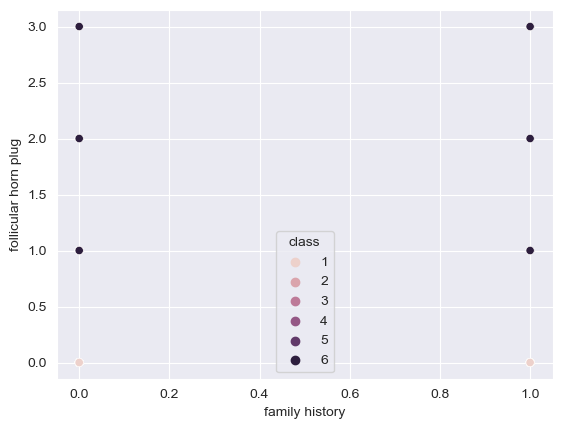

In [185]:
sns.scatterplot(x='family history', y='follicular horn plug', hue='class', data=dermatology_data)
plt.show()

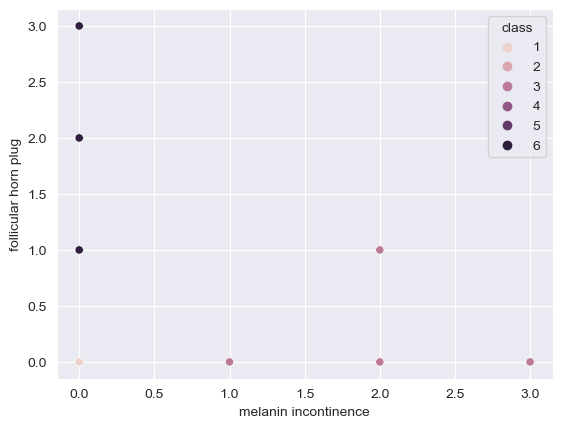

In [186]:
sns.scatterplot(x='melanin incontinence', y='follicular horn plug', hue='class', data=dermatology_data)
plt.show()

## 3.3 Data Scaling

In [187]:
dermatology_data_scaled = dermatology_data.copy()
for column in dermatology_data.columns[:-1]:
    col_min = dermatology_data[column].min()
    col_max = dermatology_data[column].max()
    dermatology_data_scaled[column] = (dermatology_data[column] - col_min) / (col_max - col_min)

## 3.4 Data Splitting
- Split the data into features and target
- One-hot encode the target, to get 6 output nodes
- Split the data into train and test sets

In [188]:
# Splitting the data into features and target
X = dermatology_data_scaled.drop('class', axis=1).values
y = dermatology_data_scaled['class'].values

# One-hot encoding the target, to get 6 output nodes, it will more fit to train ANN model
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

/Users/zhaochengxin/anaconda3/envs/Learn/lib/python3.8/site-packages/sklearn/preprocessing/_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


# 4. ANN Model
## 4.1 Tools preparation
- I choose use sigmoid as my activation function
- I choose use cross-entropy as my loss function
- Due to the output is multi-class, I choose use softmax as my activation function for output layer

In [189]:
def sigmoid(x):
    """
    To compute the sigmoid function for the input x
    :param x: the input data
    :return: the sigmoid function for the input x
    """
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    """
    To compute the derivative of the sigmoid function for the input x
    :param x: the input data
    :return: the derivative of the sigmoid function for the input x
    """
    return x * (1 - x)

def softmax(x):
    """
    To compute the softmax function for the input x, due to the output is multi-class, I choose use softmax as my activation function in output layer
    :param x: the input data
    :return: the softmax function for the input x
    """
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=1, keepdims=True)

def categorical_cross_entropy_loss(y_true, y_pred):
    """
    Due to the output is multi-class, I choose use cross-entropy as my loss function
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :return: the cross-entropy loss for the input y_true and y_pred
    """
    return -np.sum(y_true * np.log(y_pred))

## 4.2 ANN implementation

In [190]:
class ANN:
    def __init__(self, input_size, hidden_size, output_size):
        """
        - I choose use 2 layers ANN model, the first layer is hidden layer, the second layer is output layer. I used the random "randn" function to initialize the weights to get more accuracy and help the model to fitting the data better.
        - For the bias, I used the zeros function to initialize the bias.
        :param input_size: the number of input nodes
        :param hidden_size: the number of hidden nodes
        :param output_size: the number of output nodes
        :return: None
        """
        self.weights1 = np.random.randn(input_size, hidden_size)
        self.bias1 = np.zeros((1, hidden_size))
        self.weights2 = np.random.randn(hidden_size, output_size)
        self.bias2 = np.zeros((1, output_size))
        
        self.cost_history = []

    def feedforward(self, X):
        """
        In the feedforward pass, the weighted sum of the inputs and the bias is computed for each node in the hidden layer. The result is then passed through the sigmoid activation function to get the output of the hidden layer. The same process is repeated for the output layer, but the activation function used is softmax.
        :param X: the input data - X
        :return: the output of the output layer
        """
        self.layer1 = sigmoid(np.dot(X, self.weights1) + self.bias1)
        self.output = softmax(np.dot(self.layer1, self.weights2) + self.bias2)
        return self.output

    def backpropagation(self, X, y, learning_rate):
        """
        In the backpropagation pass, the error is computed for the output layer. The weights and biases are then updated using the error and the learning rate. The same process is repeated for the hidden layer.
        :param X: the input data - X
        :param y: the target data - y
        :param learning_rate: the learning rate
        """

        """
        Calculate the error and delta for each layer, due to the output is multi-class, I choose use cross-entropy as my loss function and the softmax as my activation function for output layer, so the output_delta can equal to the output_error.
        """
        output_error = self.output - y
        output_delta = output_error

        layer1_error = output_delta.dot(self.weights2.T)
        layer1_delta = layer1_error * sigmoid_derivative(self.layer1)

        """
        Update the weights and bias for each layer
        """
        self.weights2 -= self.layer1.T.dot(output_delta) * learning_rate
        self.bias2 -= np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights1 -= X.T.dot(layer1_delta) * learning_rate
        self.bias1 -= np.sum(layer1_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        """
        The train function is used to train the model for a specified number of epochs. The feedforward and backpropagation functions are called for each epoch. The loss is also computed for each epoch.
        :param X: the input data - X
        :param y: the target data(class) - y
        :param epochs: the number of epochs
        :param learning_rate: the learning rate
        """
        for epoch in range(epochs):
            self.feedforward(X)
            self.backpropagation(X, y, learning_rate)
            self.cost_history.append(categorical_cross_entropy_loss(y, self.output))
            
    def predict(self, X):
        """
        The predict function is used to predict the classes for the input data. The feedforward function is called to get the output of the output layer. The class with the highest probability is chosen as the predicted class.
        :param X: the input data - X
        :return: the predicted classes
        """
        output = self.feedforward(X)
        return np.argmax(output, axis=1)

# 5. Model Training

In [191]:
ann = ANN(X_train.shape[1], 10, y_train.shape[1])

ann.train(X_train, y_train, epochs=1000, learning_rate=0.01)

y_pred = ann.predict(X_test)

# To get the predicted labels, convert the one-hot encoded labels to integers
y_test_labels = np.argmax(y_test, axis=1)

# 6. Model Evaluation
## 6.1 Accuracy
I will calculate the accuracy of the model.
Accuracy is calculated as follows:
$$\( \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} \times 100 \) $$
Where:
- $\( \text{Number of correct predictions} \)$ is the number of correct predictions.
- $\( \text{Total number of predictions} \)$ is the number of all predictions.
- $\( \text{Accuracy} \)$ is the accuracy of the model.
- I will use the function below to calculate the accuracy of the model.

In [192]:
def accuracy(y_true, y_pred):
    """
    The accuracy function is used to compute the accuracy of the model.
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :return: the accuracy of the model
    """
    return np.sum(y_true == y_pred) / len(y_true) * 100

print(f"Accuracy: {accuracy(y_test_labels, y_pred):.2f}%")

Accuracy: 98.65%


## 6.2 Loss Curve

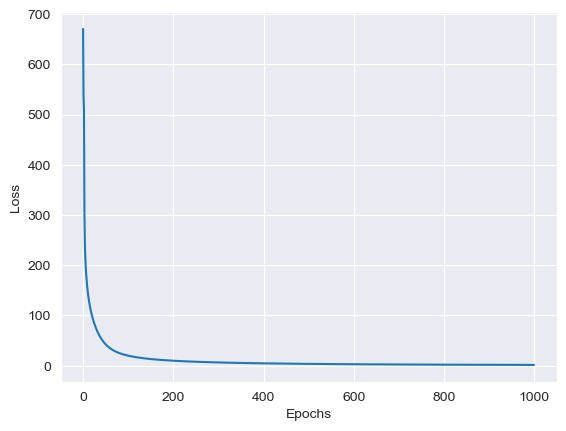

In [193]:
import matplotlib.pyplot as plt
plt.plot(range(1000), ann.cost_history)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## 6.3 Modify the hidden layer size

In [194]:
ann1 = ANN(X_train.shape[1], 2, y_train.shape[1])
ann1.train(X_train, y_train, epochs=1000, learning_rate=0.01)
y_pred1 = ann1.predict(X_test)
print(f"Accuracy: {accuracy(y_test_labels, y_pred1):.2f}%")

ann2 = ANN(X_train.shape[1], 5, y_train.shape[1])
ann2.train(X_train, y_train, epochs=1000, learning_rate=0.01)
y_pred2 = ann2.predict(X_test)
print(f"Accuracy: {accuracy(y_test_labels, y_pred2):.2f}%")

ann3 = ANN(X_train.shape[1], 10, y_train.shape[1])
ann3.train(X_train, y_train, epochs=1000, learning_rate=0.01)
y_pred3 = ann3.predict(X_test)
print(f"Accuracy: {accuracy(y_test_labels, y_pred3):.2f}%")

ann4 = ANN(X_train.shape[1], 20, y_train.shape[1])
ann4.train(X_train, y_train, epochs=1000, learning_rate=0.01)
y_pred4 = ann4.predict(X_test)
print(f"Accuracy: {accuracy(y_test_labels, y_pred4):.2f}%")

Accuracy: 95.95%
Accuracy: 98.65%
Accuracy: 98.65%
Accuracy: 98.65%


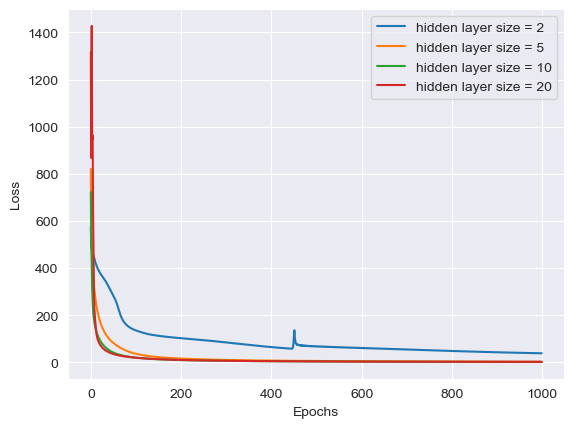

In [195]:
cost_history1 = ann1.cost_history
cost_history2 = ann2.cost_history
cost_history3 = ann3.cost_history
cost_history4 = ann4.cost_history

plt.plot(range(1000), cost_history1, label='hidden layer size = 2')
plt.plot(range(1000), cost_history2, label='hidden layer size = 5')
plt.plot(range(1000), cost_history3, label='hidden layer size = 10')
plt.plot(range(1000), cost_history4, label='hidden layer size = 20')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 6.4 Modify the learning rate

In [196]:
ann5 = ANN(X_train.shape[1], 10, y_train.shape[1])
ann5.train(X_train, y_train, epochs=1000, learning_rate=0.001)
y_pred5 = ann5.predict(X_test)
print(f"Accuracy: {accuracy(y_test_labels, y_pred5):.2f}%")

ann6 = ANN(X_train.shape[1], 10, y_train.shape[1])
ann6.train(X_train, y_train, epochs=1000, learning_rate=0.01)
y_pred6 = ann6.predict(X_test)
print(f"Accuracy: {accuracy(y_test_labels, y_pred6):.2f}%")

ann7 = ANN(X_train.shape[1], 10, y_train.shape[1])
ann7.train(X_train, y_train, epochs=1000, learning_rate=0.1)
y_pred7 = ann7.predict(X_test)
print(f"Accuracy: {accuracy(y_test_labels, y_pred7):.2f}%")

Accuracy: 98.65%
Accuracy: 98.65%
Accuracy: 41.89%


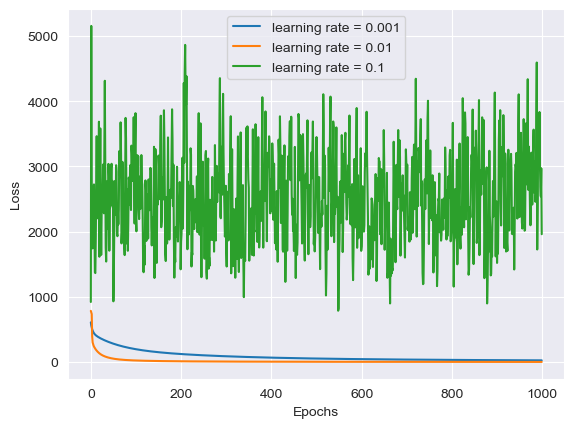

In [197]:
cost_history5 = ann5.cost_history
cost_history6 = ann6.cost_history
cost_history7 = ann7.cost_history

plt.plot(range(1000), cost_history5, label='learning rate = 0.001')
plt.plot(range(1000), cost_history6, label='learning rate = 0.01')
plt.plot(range(1000), cost_history7, label='learning rate = 0.1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 6.5 Modify the number of epochs

In [198]:
ann8 = ANN(X_train.shape[1], 10, y_train.shape[1])
ann8.train(X_train, y_train, epochs=100, learning_rate=0.01)
y_pred8 = ann8.predict(X_test)
print(f"Accuracy: {accuracy(y_test_labels, y_pred8):.2f}%")

ann9 = ANN(X_train.shape[1], 10, y_train.shape[1])
ann9.train(X_train, y_train, epochs=500, learning_rate=0.01)
y_pred9 = ann9.predict(X_test)
print(f"Accuracy: {accuracy(y_test_labels, y_pred9):.2f}%")

ann10 = ANN(X_train.shape[1], 10, y_train.shape[1])
ann10.train(X_train, y_train, epochs=1000, learning_rate=0.01)
y_pred10 = ann10.predict(X_test)
print(f"Accuracy: {accuracy(y_test_labels, y_pred10):.2f}%")

ann11 = ANN(X_train.shape[1], 10, y_train.shape[1])
ann11.train(X_train, y_train, epochs=2000, learning_rate=0.01)
y_pred11 = ann11.predict(X_test)
print(f"Accuracy: {accuracy(y_test_labels, y_pred11):.2f}%")

Accuracy: 98.65%
Accuracy: 98.65%
Accuracy: 98.65%
Accuracy: 98.65%


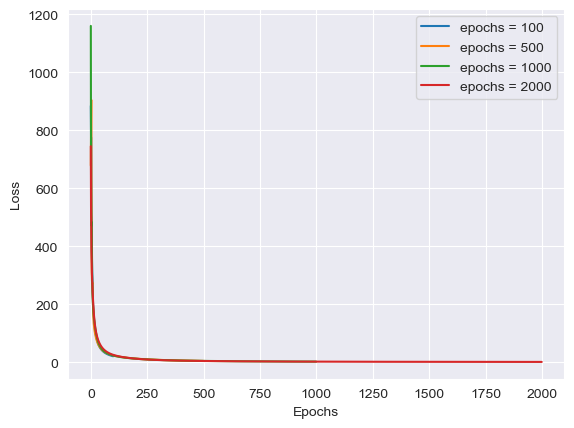

In [199]:
cost_history8 = ann8.cost_history
cost_history9 = ann9.cost_history
cost_history10 = ann10.cost_history
cost_history11 = ann11.cost_history

plt.plot(range(100), cost_history8, label='epochs = 100')
plt.plot(range(500), cost_history9, label='epochs = 500')
plt.plot(range(1000), cost_history10, label='epochs = 1000')
plt.plot(range(2000), cost_history11, label='epochs = 2000')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## 6.6 Visualization of  Confusion matrix

Recall: [1.    1.    1.    0.875 1.    1.   ]
Precision: [1.  0.9 1.  1.  1.  1. ]
F1 Score: [1.         0.94736842 1.         0.93333333 1.         1.        ]


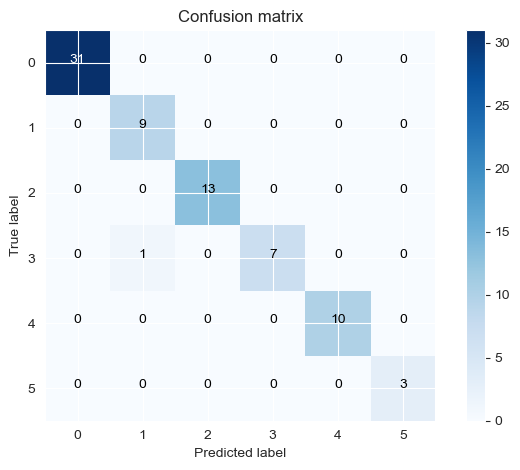

In [201]:
def confusion_matrix(y_true, y_pred):
    """
    The confusion_matrix function is used to compute the confusion matrix of the model.
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :return: the confusion matrix of the model
    """
    num_classes = len(np.unique(y_true))
    result = np.zeros((num_classes, num_classes))
    for i in range(len(y_true)):
        result[y_true[i]][y_pred[i]] += 1
        
    true_positive = np.diag(result)
    false_positive = np.sum(result, axis=0) - true_positive
    false_negative = np.sum(result, axis=1) - true_positive
    
    recall = true_positive / (true_positive + false_negative)
    precision = true_positive / (true_positive + false_positive)
    f1_score = 2 * precision * recall / (precision + recall)
    
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    
    return result

def plot_confusion_matrix(cm, classes):
    """
    The plot_confusion_matrix function is used to plot the confusion matrix of the model.
    :param cm: the confusion matrix
    :param classes: the class labels
    """
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(int(cm[i, j])),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > cm.max() / 2. else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
plot_confusion_matrix(confusion_matrix(y_test_labels, y_pred), classes=np.unique(y_test_labels))

# Decision Tree
# 1. Importing libraries

In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# 2. Load data

In [50]:
column_names = [
    "erythema", "scaling", "definite borders", "itching", "koebner phenomenon",
    "polygonal papules", "follicular papules", "oral mucosal involvement", "knee and elbow involvement",
    "scalp involvement", "family history", "melanin incontinence", "eosinophils in the infiltrate",
    "PNL infiltrate", "fibrosis of the papillary dermis", "exocytosis", "acanthosis",
    "hyperkeratosis", "parakeratosis", "clubbing of the rete ridges", "elongation of the rete ridges",
    "thinning of the suprapapillary epidermis", "spongiform pustule", "munro microabcess",
    "focal hypergranulosis", "disappearance of the granular layer", "vacuolisation and damage of basal layer",
    "spongiosis", "saw-tooth appearance of retes", "follicular horn plug", "perifollicular parakeratosis",
    "inflammatory monoluclear inflitrate", "band-like infiltrate", "Age", "class"
]

dermatology_data = pd.read_csv('dermatology/dermatology.data', header=None, names=column_names)

# 3. Data Preprocessing
## 3.1 Data replace and fill missing values

In [51]:
# Replacing the missing values with NaN
dermatology_data.replace("?", pd.NA, inplace=True)
dermatology_data['Age'] = pd.to_numeric(dermatology_data['Age'], errors='coerce')

# Filling the missing values in 'Age' with the median age
age_median = dermatology_data['Age'].median()
dermatology_data['Age'].fillna(age_median, inplace=True)

# Dropping the 'perifollicular parakeratosis' column
dermatology_data.drop('perifollicular parakeratosis', axis=1, inplace=True)

## 3.2 Splitting the data into train and test sets

In [52]:
# Splitting the data into train and test sets
train, test = train_test_split(dermatology_data, test_size=0.2, random_state=42)

# 4. Decision Tree Model
## 4.1 Tools Preparation
- calculate_entropy: Used to calculate the entropy of the data.
- split_dataset: Used to split the dataset based on the feature and feature value.

In [53]:
def calculate_entropy(data):
    """
    Calculate the entropy of the data.
    :param data: The dataset.
    :return: The entropy of the data.
    """
    labels = data.iloc[:, -1]
    label_counts = labels.value_counts()
    entropy = -sum((count/len(labels)) * np.log2(count/len(labels)) for count in label_counts)
    return entropy

def split_dataset(data, feature_index, value):
    """
    Split the dataset based on the feature and feature value.
    :param data: The dataset.
    :param feature_index: The index of the feature used to split the dataset.
    :param value: The value of the feature.
    :return: The dataset after splitting.
    """
    feature_name = data.columns[feature_index]
    reduced_data = data[data[feature_name] == value].drop(columns=[feature_name])
    return reduced_data

## 4.2 DecisionTree

In [54]:
class DecisionTree:
    def __init__(self, max_depth, min_info_gain):
        """
        Initialize the decision tree model.
        :param max_depth: The maximum depth of the tree which used to avoid over fitting.
        :param min_info_gain: The minimum information gain which used to avoid over fitting.
        """
        self.max_depth = max_depth
        self.min_info_gain = min_info_gain
        self.tree = None

    def choose_best_feature_to_split(self, data):
        """
        Choose the best feature to split the dataset, this method can be used to continuous and discrete features, like the age or the family history.
        :param data: The dataset.
        :return: The index of the best feature.
        """
        num_features = data.shape[1] - 1 
        base_entropy = calculate_entropy(data) 
        best_info_gain = 0.0 
        best_feature = -1 

        """
        To traverse all the features and find the best feature, each loop will calculate the information gain of the feature and update the best feature.
        """
        for i in range(num_features):
            feature_name = data.columns[i]
            unique_vals = set(data[feature_name])
            
            # Split the dataset based on the feature and calculate the new entropy.
            new_entropy = 0.0
            for value in unique_vals:
                sub_dataset = split_dataset(data, i, value)
                # Calculate The probability of the feature value.
                prob = len(sub_dataset) / float(len(data)) 
                # Update the new entropy.
                new_entropy += prob * calculate_entropy(sub_dataset)
            
            # Calculate the change of the entropy.
            info_gain = base_entropy - new_entropy
            # Update the best feature.
            if info_gain > best_info_gain and info_gain > self.min_info_gain:
                best_info_gain = info_gain
                best_feature = i

        return best_feature

    def build_tree(self, data, depth=0):
        """
        Use the ID3 algorithm to build the decision tree.
        :param data: The dataset.
        :param depth: The depth of the tree.
        :return: The decision tree.
        """
        labels = data.iloc[:, -1]
        if len(labels.unique()) == 1:
            return labels.iloc[0]
        if data.shape[1] == 1 or depth == self.max_depth:
            return labels.mode()[0]

        best_feature = self.choose_best_feature_to_split(data)
        if best_feature == -1:
            return labels.mode()[0]

        feature_name = data.columns[best_feature]
        tree = {feature_name: {}}
        for value in set(data[feature_name]):
            sub_data = split_dataset(data, best_feature, value)
            tree[feature_name][value] = self.build_tree(sub_data, depth + 1)

        return tree

    def fit(self, data):
        """
        Train the decision tree model.
        :param data: The dataset.
        """
        self.tree = self.build_tree(data)

    def predict_sample(self, tree, sample):
        """
        Predict the class of the signal sample.
        :param tree: The decision tree.
        :param sample: The single sample.
        :return: The predict result.
        """
        if not isinstance(tree, dict):
            return tree
        feature_index = list(tree.keys())[0]
        feature_value = sample[feature_index]
        
        if feature_value not in tree[feature_index]:
            # If the feature value is not in the tree, then return the mode of the labels.
            sub_tree = tree[feature_index][list(tree[feature_index].keys())[0]]
        else:
            sub_tree = tree[feature_index][feature_value]
        
        return self.predict_sample(sub_tree, sample)

    def predict(self, data):
        """
        Predict the class of the dataset.
        :param data: The dataset to be predicted.
        :return: The predict result.
        """
        predictions = data.apply(lambda x: self.predict_sample(self.tree, x), axis=1)
        return predictions

# 5. Model Training

In [55]:
tree = DecisionTree(max_depth=3, min_info_gain=0.1)
tree.fit(train)
predictions = tree.predict(test)

In [56]:
tree.tree

{'elongation of the rete ridges': {0: {'Age': {7.0: 6,
    8.0: 6,
    9.0: 6,
    10.0: {'follicular papules': {0: 2, 2: 6, 3: 6}},
    12.0: {'itching': {0: 4, 1: 6}},
    13.0: 6,
    15.0: 2,
    16.0: {'itching': {1: 2, 2: 4, 3: 3}},
    17.0: 4,
    18.0: {'scaling': {1: 4, 2: 3}},
    19.0: 2,
    20.0: {'definite borders': {0: 2, 1: 2, 2: 4}},
    21.0: {'erythema': {1: 4, 2: 2}},
    22.0: {'polygonal papules': {0: 4, 2: 3, 3: 3}},
    23.0: {'scaling': {1: 3, 2: 2}},
    25.0: {'spongiosis': {0: 3, 1: 4, 2: 2, 3: 2}},
    26.0: 3,
    27.0: {'parakeratosis': {0: 3, 1: 4, 2: 2}},
    28.0: 3,
    30.0: {'koebner phenomenon': {0: 2, 1: 3, 2: 4}},
    31.0: {'erythema': {1: 4, 3: 2}},
    32.0: {'itching': {0: 4, 2: 3, 3: 3}},
    33.0: 2,
    34.0: {'koebner phenomenon': {0: 2, 1: 4, 3: 3}},
    35.0: {'itching': {0: 4, 1: 4, 2: 2, 3: 3}},
    36.0: {'polygonal papules': {0: 2, 2: 3, 3: 3}},
    37.0: 3,
    38.0: 3,
    40.0: {'band-like infiltrate': {0: 2, 1: 5, 2: 3, 3: 3}},

# 6. Model Evaluation
## 6.1 Accuracy
I will calculate the accuracy of the model.
Accuracy is calculated as follows:
$$\( \text{Accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} \times 100 \) $$
Where:
- $\( \text{Number of correct predictions} \)$ is the number of correct predictions.
- $\( \text{Total number of predictions} \)$ is the number of all predictions.
- $\( \text{Accuracy} \)$ is the accuracy of the model.
- I will use the function below to calculate the accuracy of the model.

In [57]:
def accuracy(y_true, y_pred):
    """
    The accuracy function is used to compute the accuracy of the model.
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :return: the accuracy of the model
    """
    return np.sum(y_true == y_pred) / len(y_true) * 100

print("Accuracy: {:.2f}%".format(accuracy(test.iloc[:, -1], predictions)))

Accuracy: 67.57%


## 6.2 Modify the MAX Depth

In [58]:
tree1 = DecisionTree(max_depth=1, min_info_gain=0.1)
tree1.fit(train)
predictions1 = tree1.predict(test)
print("Accuracy: {:.2f}%".format(accuracy(test.iloc[:, -1], predictions1)))

tree2 = DecisionTree(max_depth=2, min_info_gain=0.1)
tree2.fit(train)
predictions2 = tree2.predict(test)
print("Accuracy: {:.2f}%".format(accuracy(test.iloc[:, -1], predictions2)))

tree3 = DecisionTree(max_depth=3, min_info_gain=0.1)
tree3.fit(train)
predictions3 = tree3.predict(test)
print("Accuracy: {:.2f}%".format(accuracy(test.iloc[:, -1], predictions3)))

tree4 = DecisionTree(max_depth=4, min_info_gain=0.1)
tree4.fit(train)
predictions4 = tree4.predict(test)
print("Accuracy: {:.2f}%".format(accuracy(test.iloc[:, -1], predictions4)))

Accuracy: 59.46%
Accuracy: 60.81%
Accuracy: 67.57%
Accuracy: 66.22%


## 6.3 Modify the MIN Info Gain

In [59]:
tree1 = DecisionTree(max_depth=3, min_info_gain=0.1)
tree1.fit(train)
predictions1 = tree1.predict(test)
print("Accuracy: {:.2f}%".format(accuracy(test.iloc[:, -1], predictions1)))

tree2 = DecisionTree(max_depth=3, min_info_gain=0.3)
tree2.fit(train)
predictions2 = tree2.predict(test)
print("Accuracy: {:.2f}%".format(accuracy(test.iloc[:, -1], predictions2)))

tree3 = DecisionTree(max_depth=3, min_info_gain=0.9)
tree3.fit(train)
predictions3 = tree3.predict(test)
print("Accuracy: {:.2f}%".format(accuracy(test.iloc[:, -1], predictions3)))

tree4 = DecisionTree(max_depth=3, min_info_gain=1.2)
tree4.fit(train)
predictions4 = tree4.predict(test)
print("Accuracy: {:.2f}%".format(accuracy(test.iloc[:, -1], predictions4)))

Accuracy: 67.57%
Accuracy: 66.22%
Accuracy: 41.89%
Accuracy: 41.89%


# 6.4 Confusion Matrix

Recall: [0.87096774 0.55555556 0.61538462 0.25       0.7        0.33333333]
F1 Score: [0.93103448 0.37037037 0.64       0.26666667 0.77777778 0.4       ]


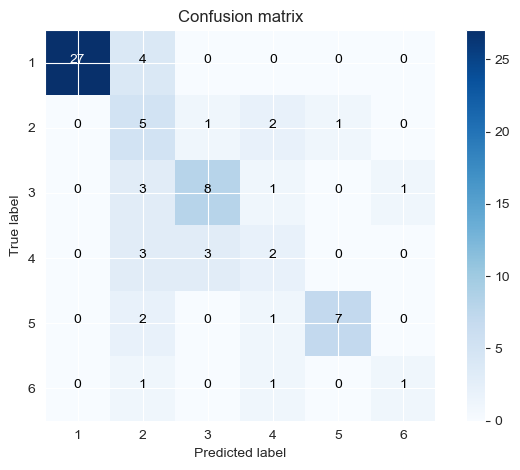

In [61]:
def confusion_matrix(y_true, y_pred):
    """
    The confusion matrix function is used to compute the confusion matrix of the model.
    :param y_true: the true labels
    :param y_pred: the predicted labels
    :return: the confusion matrix of the model
    """
    labels = np.unique(y_true)
    matrix = np.zeros((len(labels), len(labels)))
    for i in range(len(labels)):
        for j in range(len(labels)):
            matrix[i, j] = np.sum((y_true == labels[i]) & (y_pred == labels[j]))
    
    true_positives = np.diag(matrix)
    false_positives = np.sum(matrix, axis=0) - true_positives
    false_negatives = np.sum(matrix, axis=1) - true_positives
    
    precision = true_positives / (true_positives + false_positives)
    recall = true_positives / (true_positives + false_negatives)
    f1_score = 2 * precision * recall / (precision + recall)
    
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1_score}")
    return matrix

def plot_confusion_matrix(cm, classes):
    """
    The plot_confusion_matrix function is used to plot the confusion matrix of the model.
    :param cm: the confusion matrix
    :param classes: the class labels
    """
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(int(cm[i, j])),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > cm.max() / 2. else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
plot_confusion_matrix(confusion_matrix(test.iloc[:, -1], predictions), classes=np.unique(test.iloc[:, -1]))

# KNN
# 1. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 2. Load Data

In [2]:
column_names = [
    "erythema", "scaling", "definite borders", "itching", "koebner phenomenon",
    "polygonal papules", "follicular papules", "oral mucosal involvement", "knee and elbow involvement",
    "scalp involvement", "family history", "melanin incontinence", "eosinophils in the infiltrate",
    "PNL infiltrate", "fibrosis of the papillary dermis", "exocytosis", "acanthosis",
    "hyperkeratosis", "parakeratosis", "clubbing of the rete ridges", "elongation of the rete ridges",
    "thinning of the suprapapillary epidermis", "spongiform pustule", "munro microabcess",
    "focal hypergranulosis", "disappearance of the granular layer", "vacuolisation and damage of basal layer",
    "spongiosis", "saw-tooth appearance of retes", "follicular horn plug", "perifollicular parakeratosis",
    "inflammatory monoluclear inflitrate", "band-like infiltrate", "Age", "class"
]

dermatology_data = pd.read_csv('dermatology/dermatology.data', header=None, names=column_names)

# 3. Data Preprocessing
## 3.1 Data replace and fill missing values
- Replace the missing values with NaN
- Convert the 'Age' column to numeric
- Fill the missing values in 'Age' with the median age
- Drop the 'perifollicular parakeratosis' column(because all values are 0)

In [3]:
# Replacing the missing values with NaN
dermatology_data.replace("?", pd.NA, inplace=True)
dermatology_data['Age'] = pd.to_numeric(dermatology_data['Age'], errors='coerce')

# Filling the missing values in 'Age' with the median age
age_median = dermatology_data['Age'].median()
dermatology_data['Age'].fillna(age_median, inplace=True)

# Dropping the 'perifollicular parakeratosis' column
dermatology_data.drop('perifollicular parakeratosis', axis=1, inplace=True)

## 3.2 Data Scaling
I scaled the data using the min-max scaling method. This method scales the data to a fixed range - usually 0 to 1.
To get a more accurate result, I scaled the data after filling the missing values.
The formula I used for scaling the data is:

$$\[
x' = \frac{x - x_{min}}{x_{max} - x_{min}}
\]$$

Where:
- \( x \): The original value.
- \( x' \): The scaled value.
- \( x_{min} \): The minimum value of the feature.
- \( x_{max} \): The maximum value of the feature.

In [4]:
dermatology_data_scaled = dermatology_data.copy()
for column in dermatology_data.columns[:-1]:
    col_min = dermatology_data[column].min()
    col_max = dermatology_data[column].max()
    dermatology_data_scaled[column] = (dermatology_data[column] - col_min) / (col_max - col_min)

## 3.2 Data Splitting
- Split the data into features and target
- Split the data into train and test sets

In [5]:
X = dermatology_data_scaled.drop('class', axis=1).values
y = dermatology_data_scaled['class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. KNN algorithm
## 4.1 Tool preparation
I used the Euclidean distance to calculate the distance between the test sample and the training samples.

The Euclidean distance is the straight-line distance between two points in Euclidean space. For points \( P \) and \( Q \), if the coordinates of \( P \) are \( (p_1, p_2, ..., p_n) \) and the coordinates of \( Q \) are \( (q_1, q_2, ..., q_n) \), then the Euclidean distance \( d \) between points \( P \) and \( Q \) can be calculated using the following formula:


$$\[
d(P, Q) = \sqrt{(q_1 - p_1)^2 + (q_2 - p_2)^2 + ... + (q_n - p_n)^2}
\]$$

Where:
- \( p_1, p_2, ..., p_n \): Coordinates of point \( P \) in an n-dimensional space.
- \( q_1, q_2, ..., q_n \): Coordinates of point \( Q \) in an n-dimensional space.
- \( n \): Dimension of the space.


In [6]:
def euclidean_distance(sample1, sample2):
    """
    To calculate the euclidean distance between two samples.
    """
    return np.sqrt(np.sum((sample1 - sample2) ** 2))

## 4.2 KNN algorithm

In [7]:
class KNN:
    def __init__(self, k, test_sample, train_data, train_labels):
        """
        KnnClassifier to predict the class of a single test sample.
        :param k: Number of nearest neighbors to consider.
        :param test_sample: The test sample for which we want to predict the class.
        :param train_data: The training data set.
        :param train_labels: The labels of the training data set.
        """
        self.k = k
        self.test_sample = test_sample
        self.train_data = train_data
        self.train_labels = train_labels

    def predict(self):
        """
        To predict the class of the test sample.
        :return: The predicted class.
        """
        # This step calculates the euclidean distance between the test sample and all the training samples.
        distances = np.array([euclidean_distance(self.test_sample, train_sample) for train_sample in self.train_data])
        # This step sorts the distances in ascending order and returns the indices of the first k neighbors.
        k_nearest_indices = np.argsort(distances)[:self.k]
        # This step gets the labels of the k nearest neighbors.
        k_nearest_labels = self.train_labels[k_nearest_indices]
        prediction = np.argmax(np.bincount(k_nearest_labels))
        return prediction


# 5. Model Evaluation
# 5.1 Accuracy

I used the KNN algorithm to predict the class of each test sample, and then calculated the accuracy of the model.
The formula for accuracy is:

$$\[
Accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions}
\]$$

Where:
- Number of correct predictions: The number of test samples that were correctly predicted.
- Total number of predictions: The total number of test samples.
- Accuracy: The accuracy of the model.

In [8]:
predictions = []
for i in range(len(X_test)):
    knn = KNN(k=5, test_sample=X_test[i], train_data=X_train, train_labels=y_train)
    predictions.append(knn.predict())
    
accuracy = np.sum(predictions == y_test) / len(y_test) * 100
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 97.30%


# 5.2 Modify the value of k

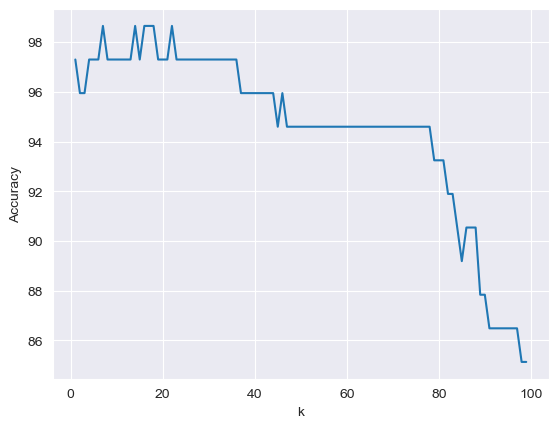

In [9]:
accuracies = []
for k in range(1, 100):
    predictions = []
    for i in range(len(X_test)):
        knn = KNN(k=k, test_sample=X_test[i], train_data=X_train, train_labels=y_train)
        predictions.append(knn.predict())
    accuracy = np.sum(predictions == y_test) / len(y_test) * 100
    accuracies.append(accuracy)
    
plt.plot(range(1, 100), accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

# 5.3 Confusion Matrix

Recall: [0.96774194 1.         1.         0.125      1.         0.        ]
F1 Score: [0.98360656 0.64285714 1.         0.2        1.                nan]


/var/folders/fm/_6wfn0r96gjcpy7779d0j2fc0000gn/T/ipykernel_29503/3602214439.py:15: RuntimeWarning: invalid value encountered in true_divide
  precision = np.diag(matrix) / np.sum(matrix, axis=0)


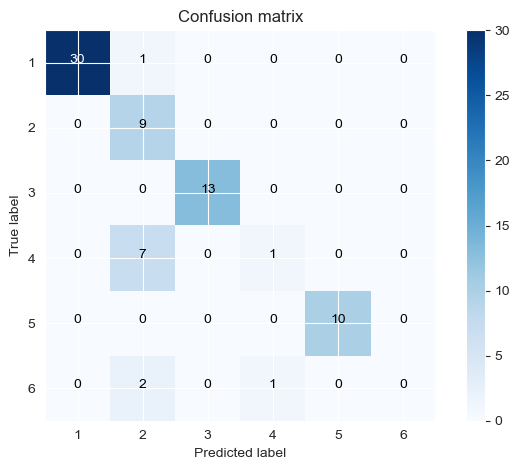

In [10]:
def confusion_matrix(actual, predicted):
    """
    To calculate the confusion matrix.
    :param actual: The actual labels of the test samples.
    :param predicted: The predicted labels of the test samples.
    :return: The confusion matrix.
    """
    classes = np.unique(actual)
    matrix = np.zeros((len(classes), len(classes)))
    for i in range(len(classes)):
        for j in range(len(classes)):
            matrix[i, j] = np.sum((actual == classes[i]) & (predicted == classes[j]))
    
    recall = np.diag(matrix) / np.sum(matrix, axis=1)
    precision = np.diag(matrix) / np.sum(matrix, axis=0)
    f1_score = 2 * (precision * recall) / (precision + recall)
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1_score}')
    return matrix

def plot_confusion_matrix(cm, classes):
    """
    The plot_confusion_matrix function is used to plot the confusion matrix of the model.
    :param cm: the confusion matrix
    :param classes: the class labels
    """
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, str(int(cm[i, j])),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > cm.max() / 2. else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()
    
plot_confusion_matrix(confusion_matrix(y_test, predictions), np.unique(y_test))